# Advanced Defect Analysis

In [ ]:
# Install doped (if not already installed)
!pip install doped

Here we describe some more targeted analysis you can do for your defect calculations parsed with `doped` (including comparing the relaxed configurations for different initial interstitial positions, structure & bond length analysis of defects, and plotting/analysis of the defect charge corrections), which may be useful for in certain cases.

## Defect-Induced Site Displacements (Strain)

Using the `DefectEntry.plot_site_displacements()` method, we can analyse the displacements of atoms around the defect site (i.e. defect-induced local strain) during geometry relaxation.

In [1]:
%matplotlib inline
from monty.serialization import loadfn
CdTe_defects_thermo = loadfn("CdTe/CdTe_thermo_wout_meta.json")  # load our DefectThermodynamics object

Let's look at the displacements of atoms around the Cd vacancy in CdTe, and how this changes with charge state:

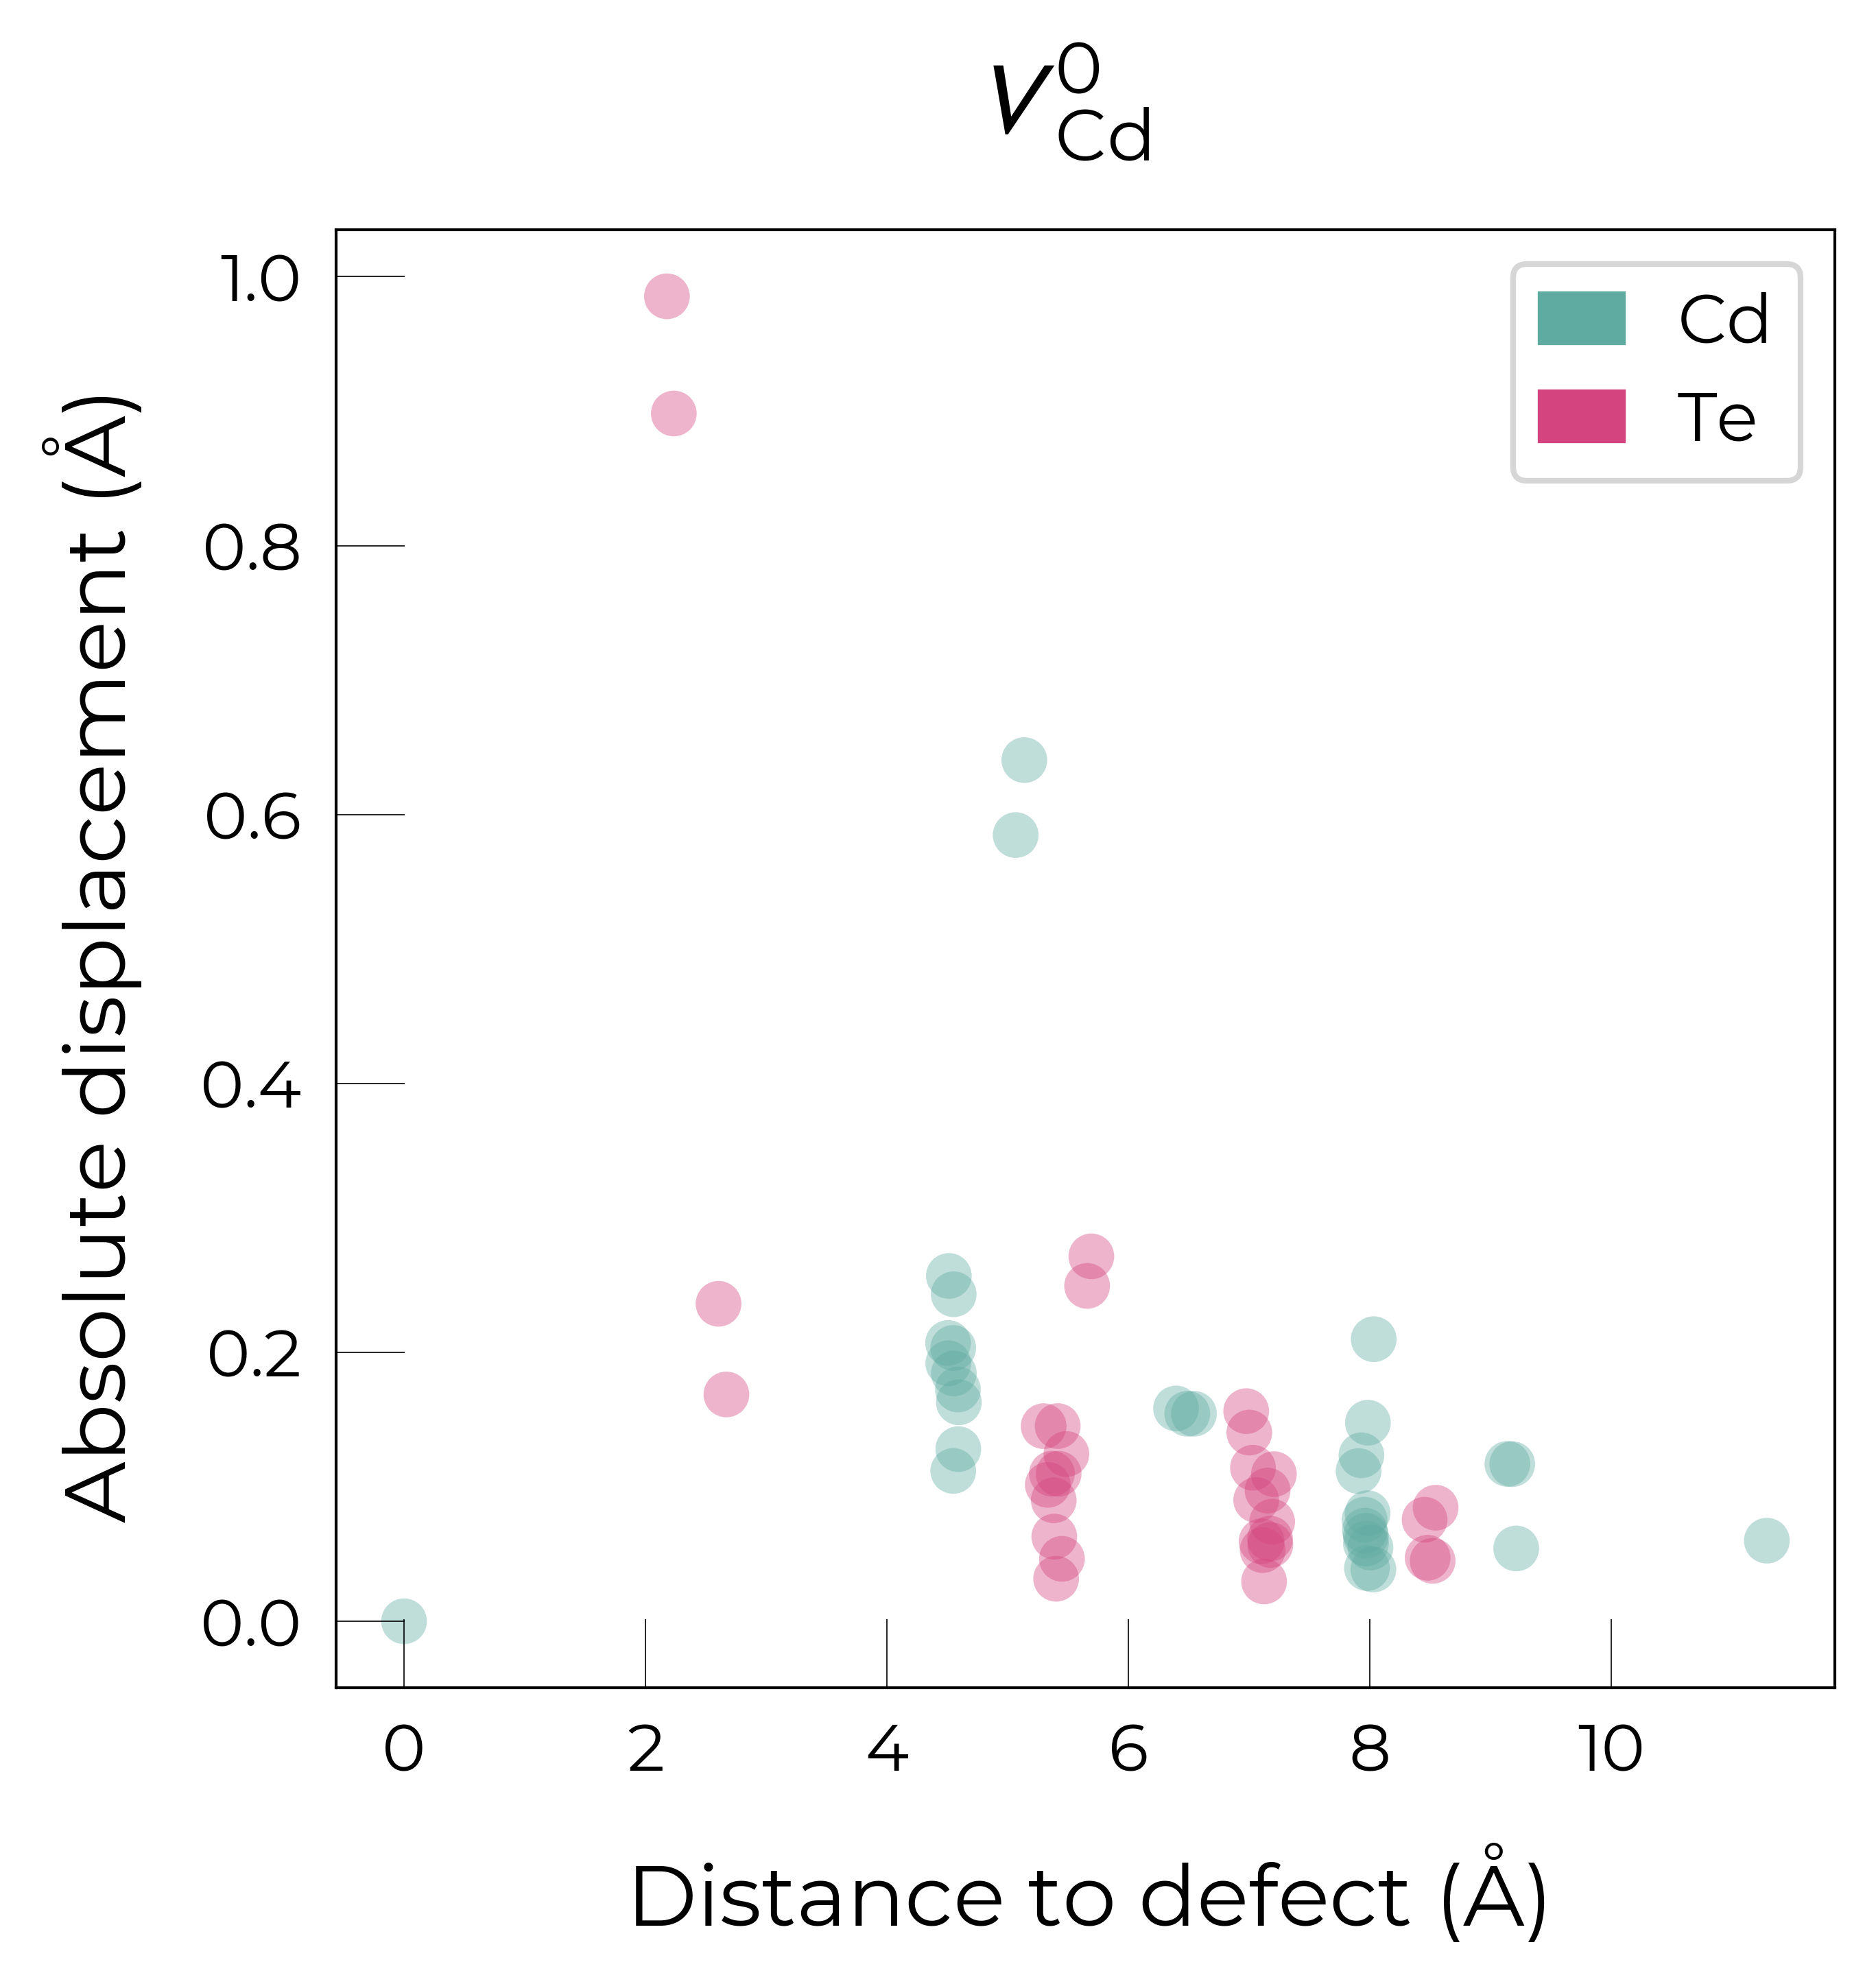

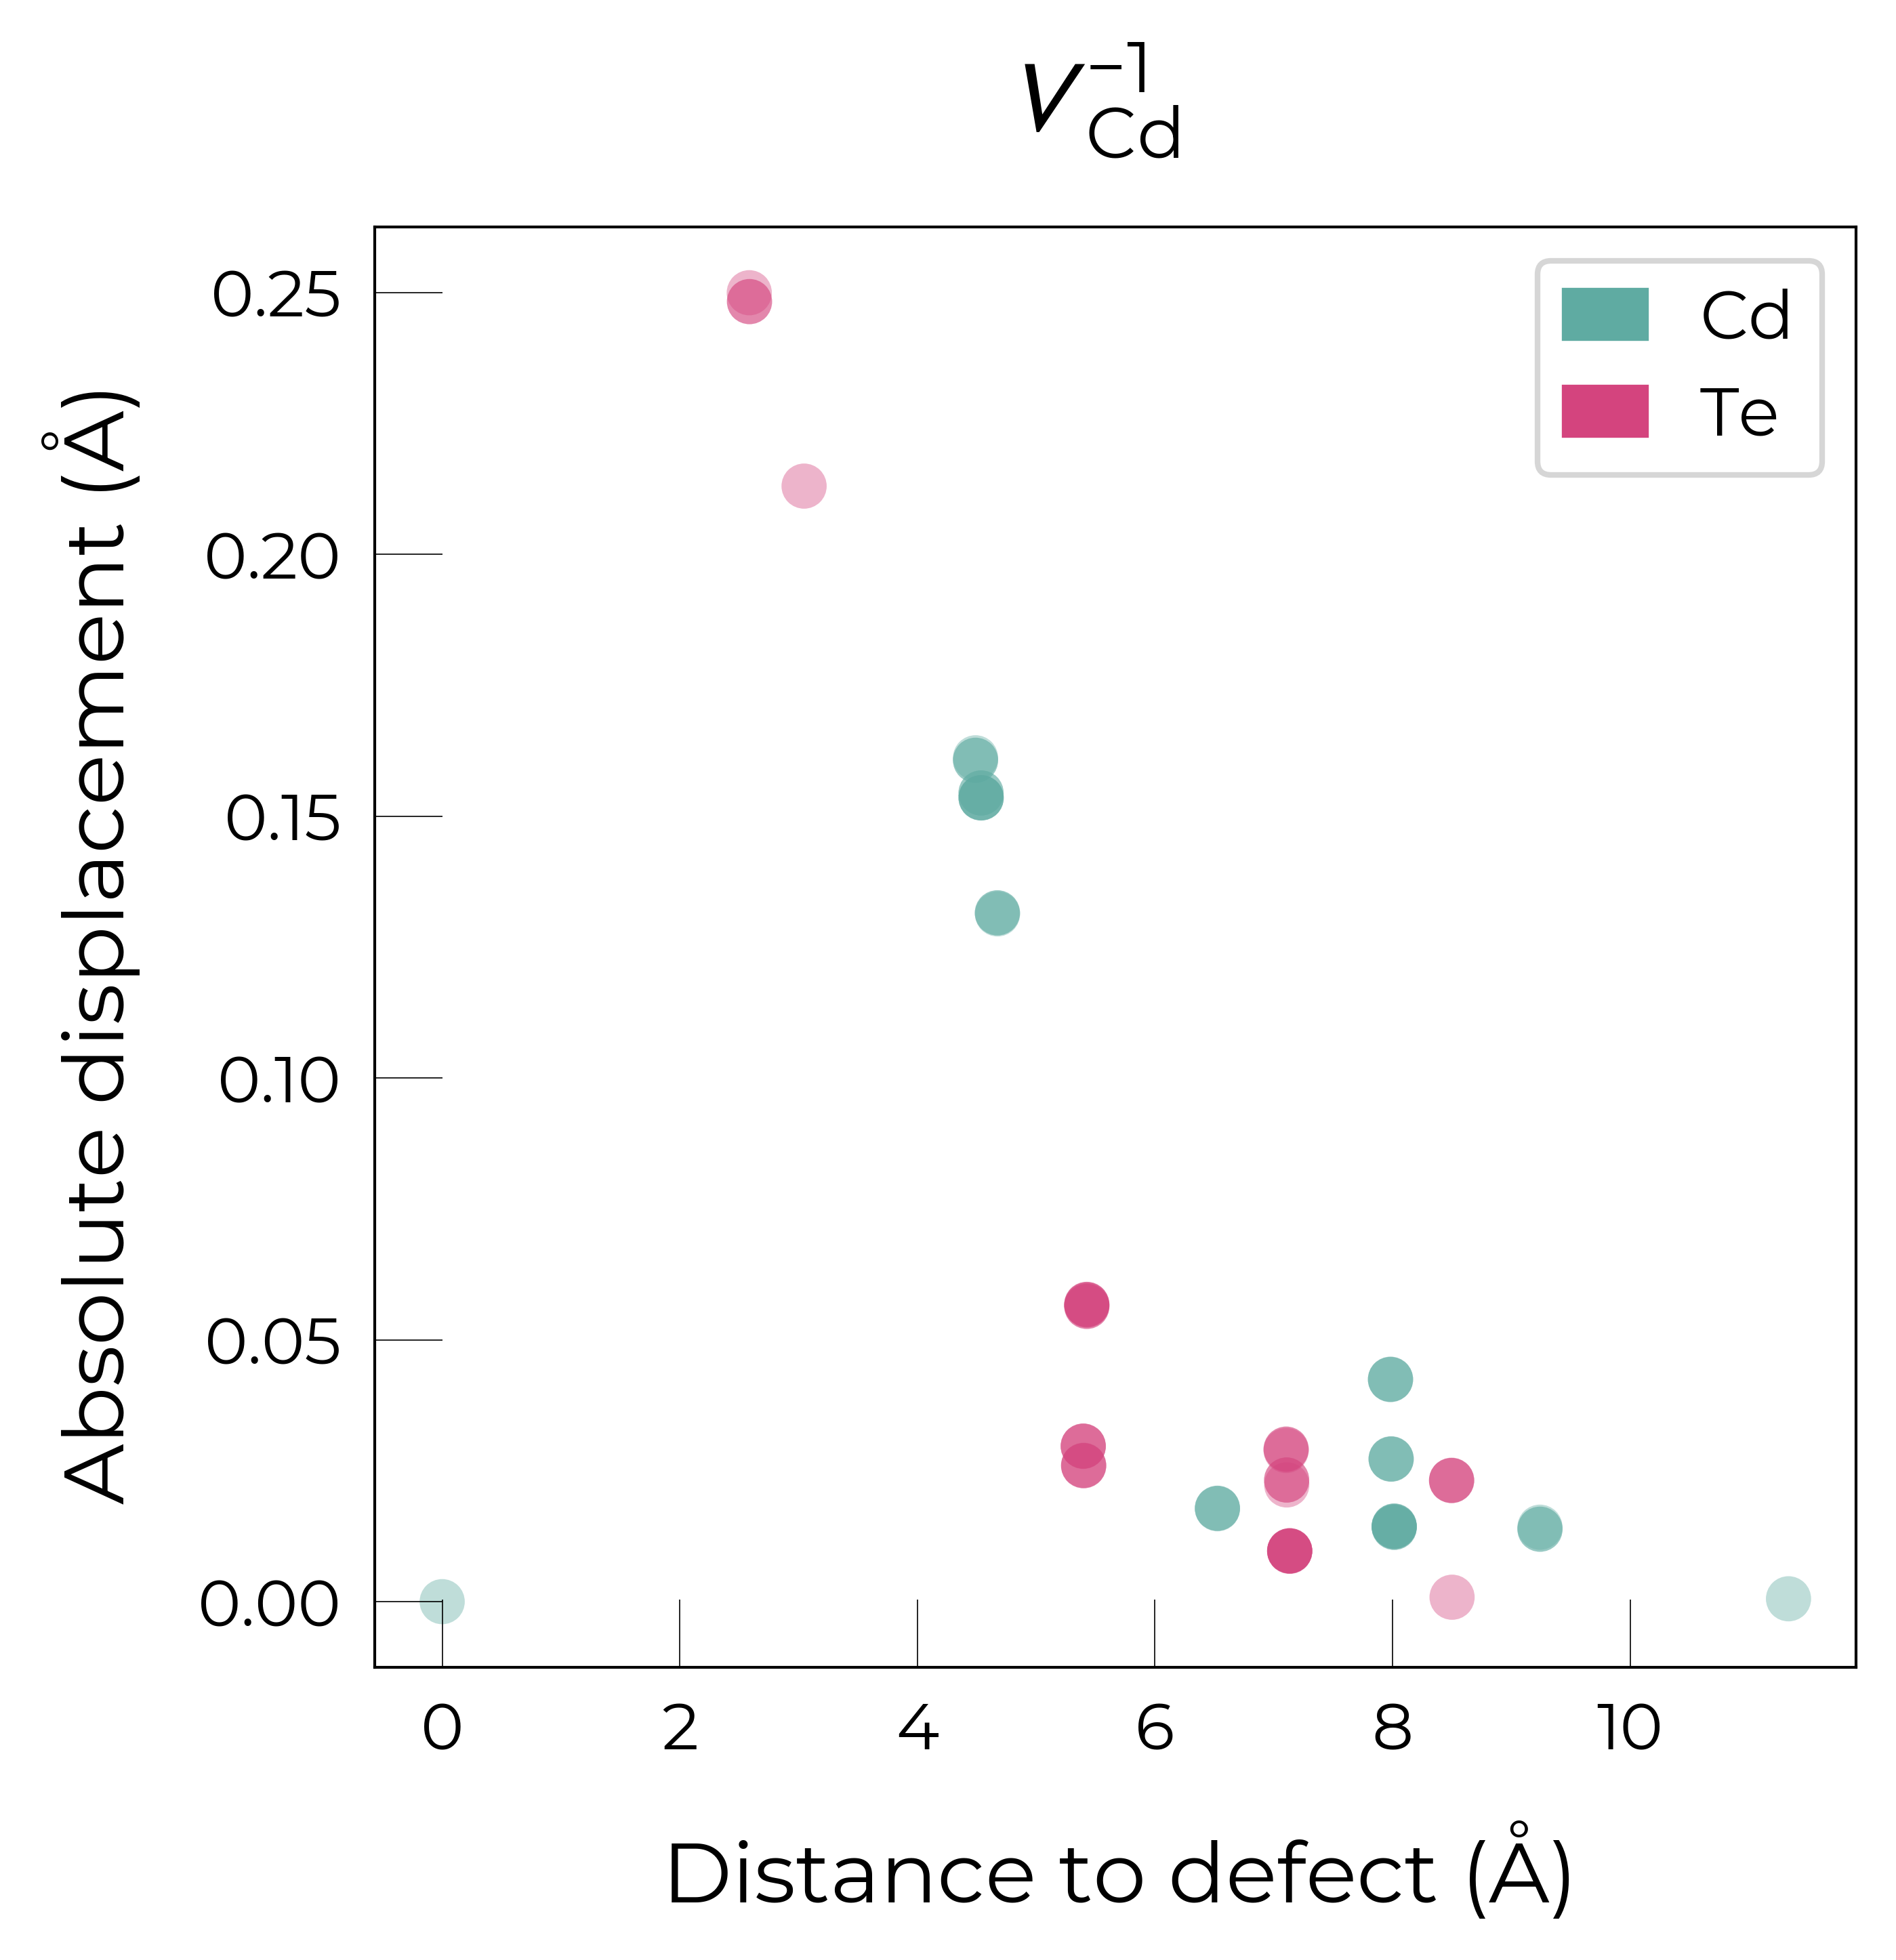

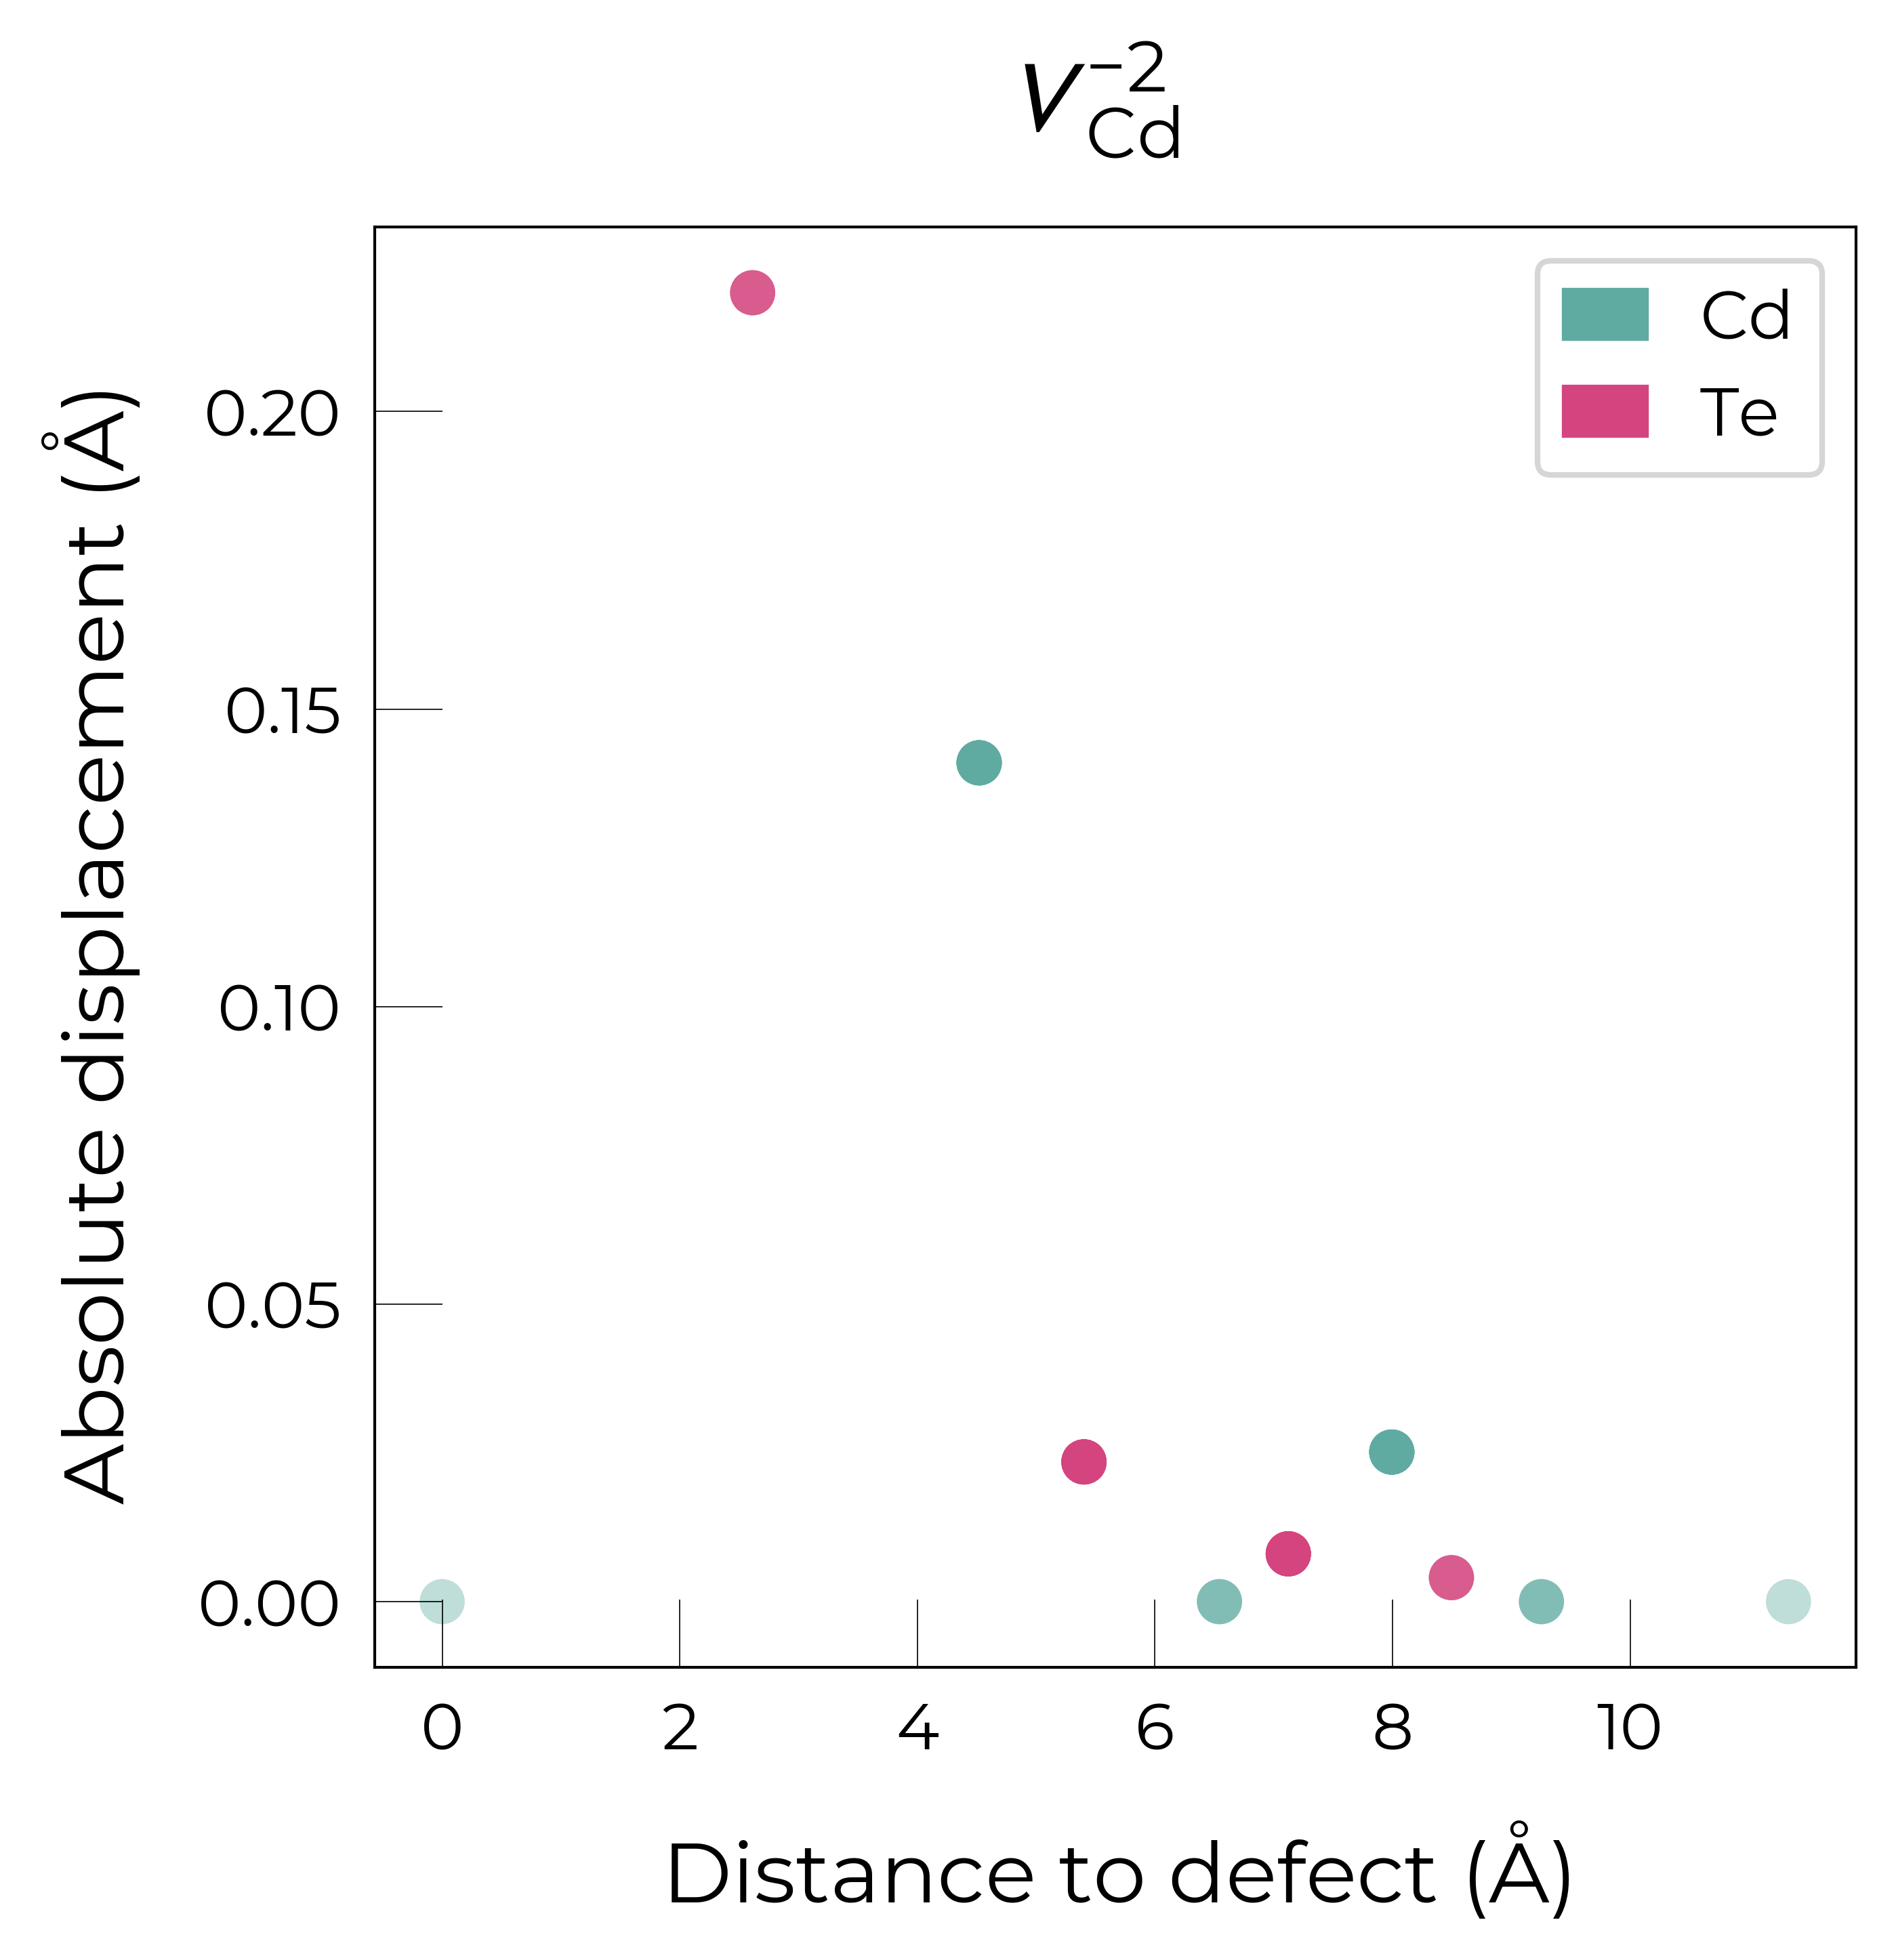

In [2]:
from doped.utils.plotting import format_defect_name

v_Cd_entries = [entry for entry in CdTe_defects_thermo.defect_entries if "v_Cd" in entry.name]
for defect_entry in v_Cd_entries:
    fig = defect_entry.plot_site_displacements(separated_by_direction=False)
    fig.suptitle(format_defect_name(defect_entry.name, include_site_info_in_name=False),
                 fontsize=18)

Separated by direction:

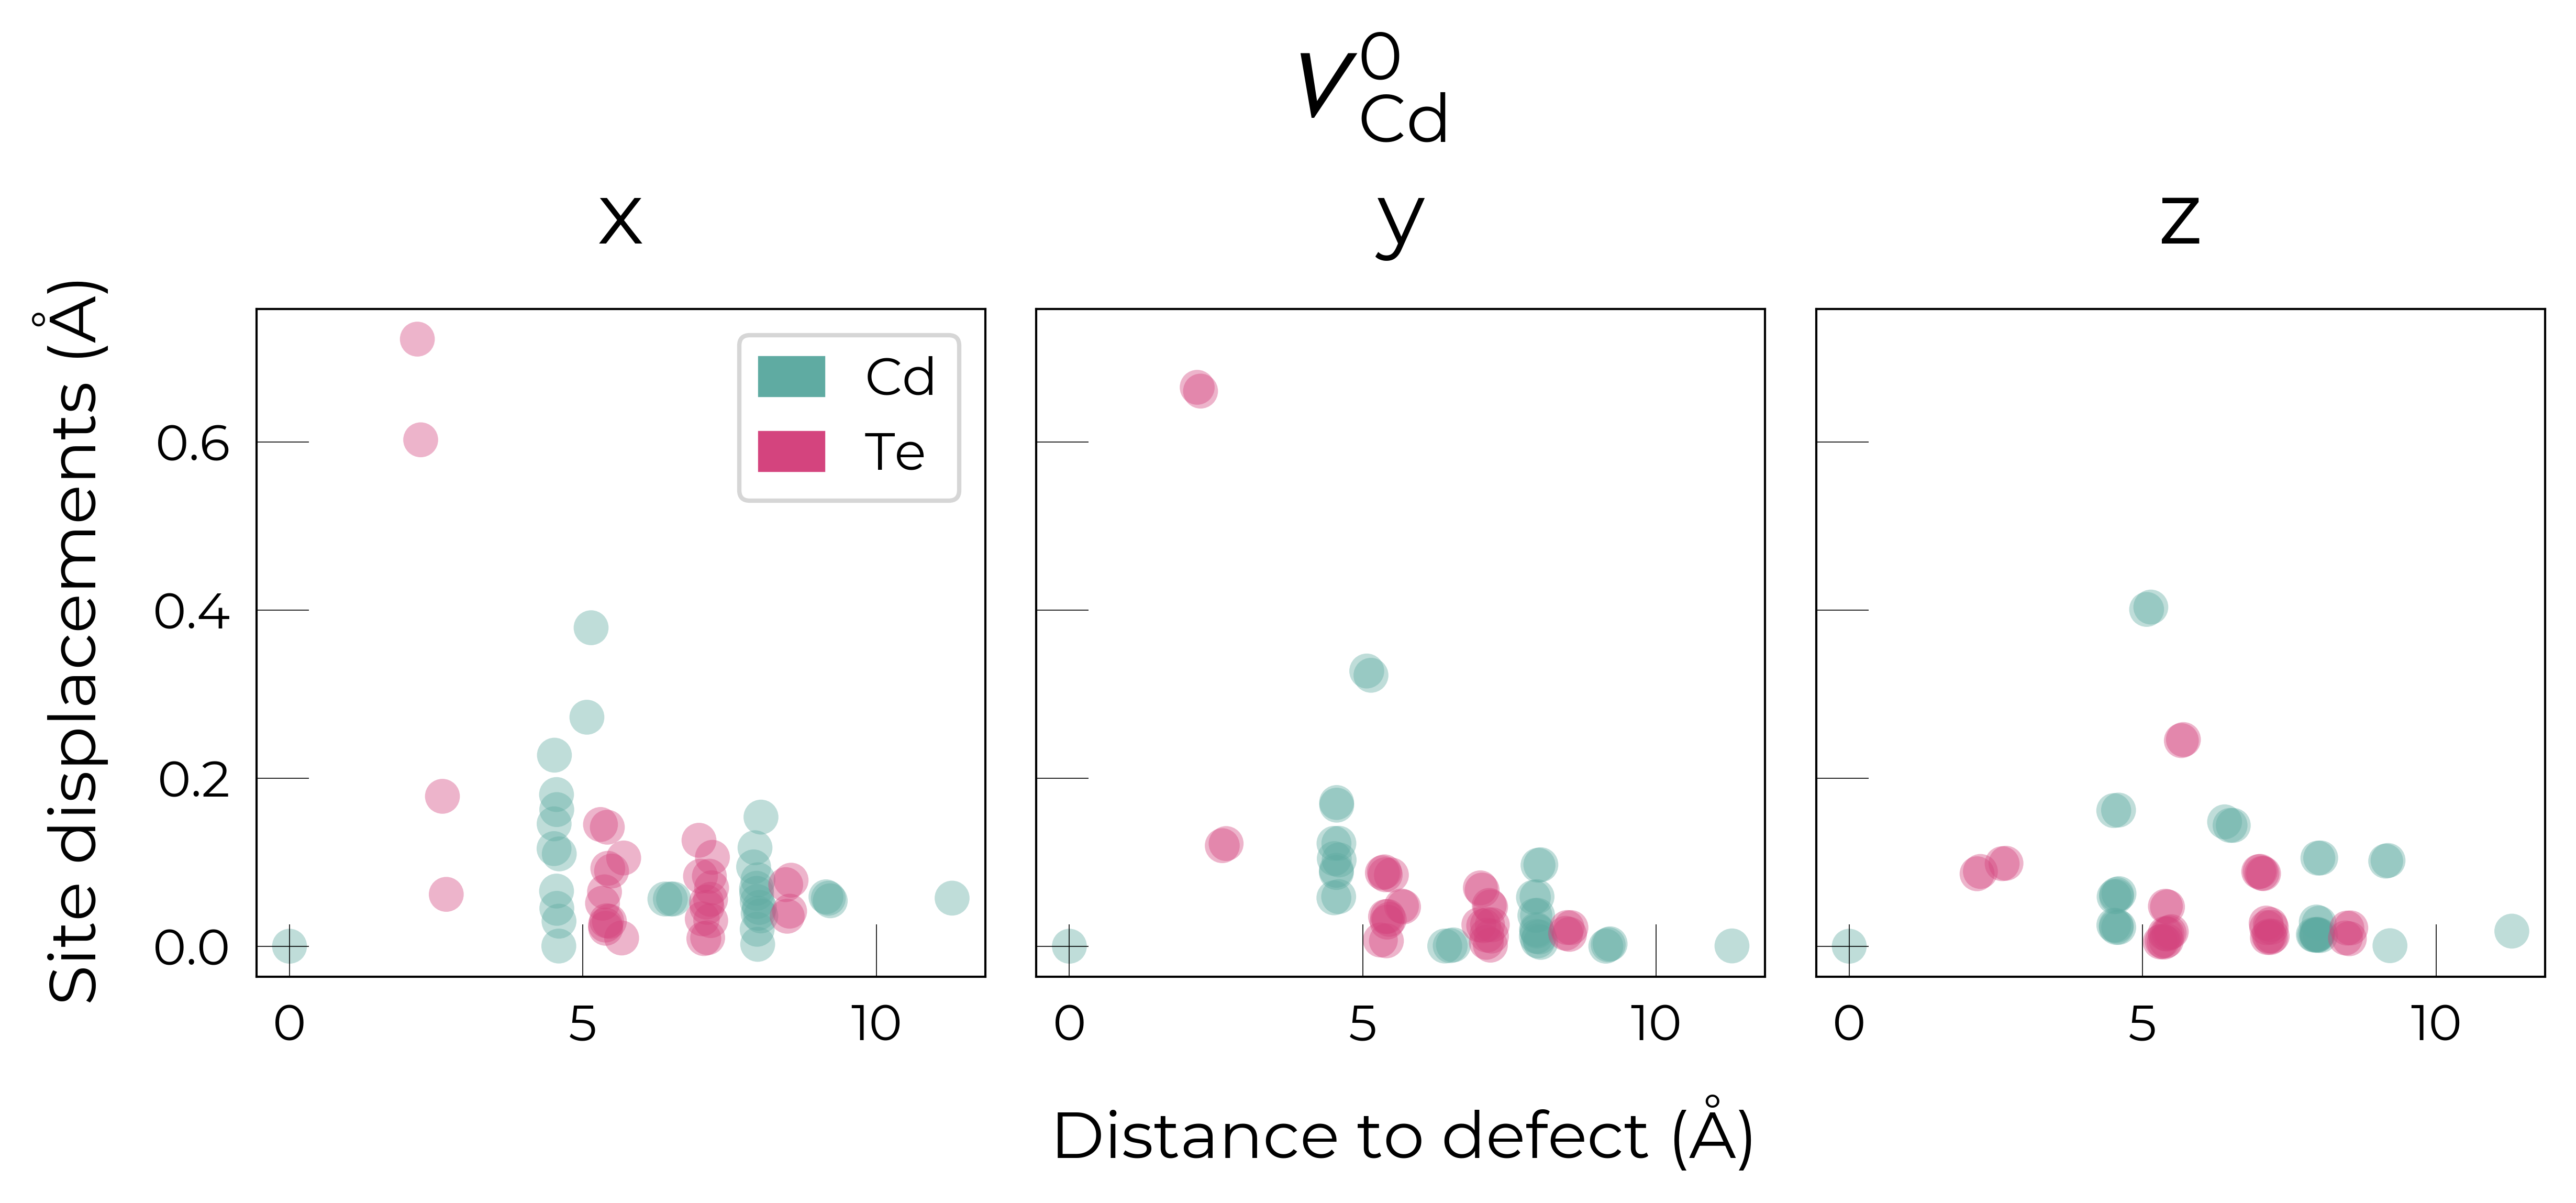

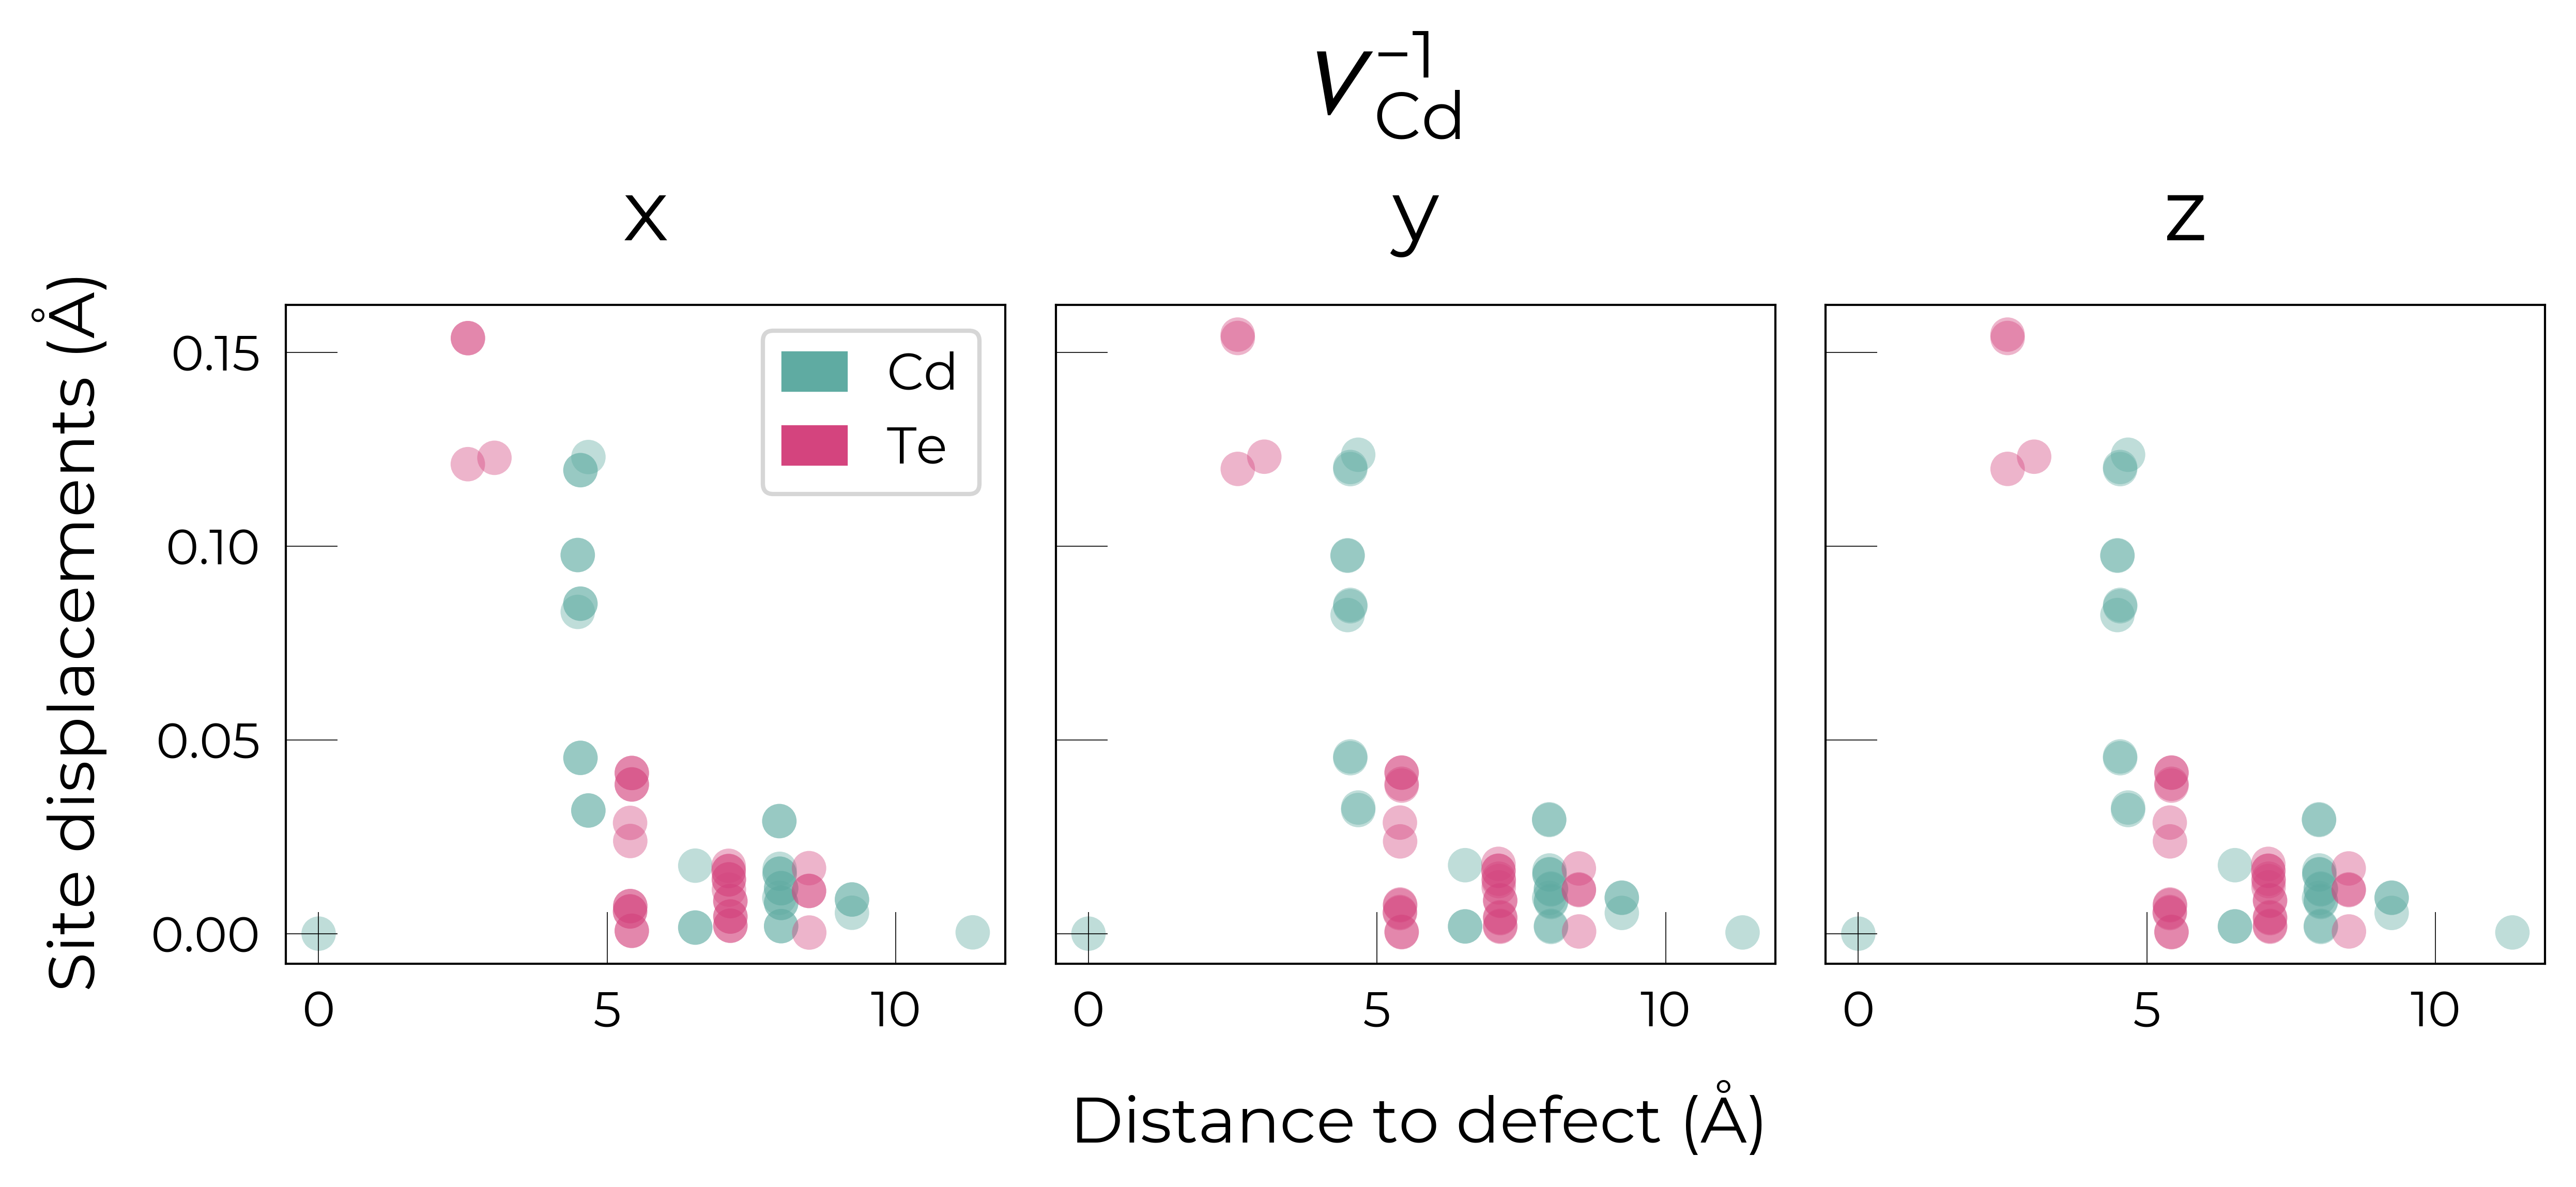

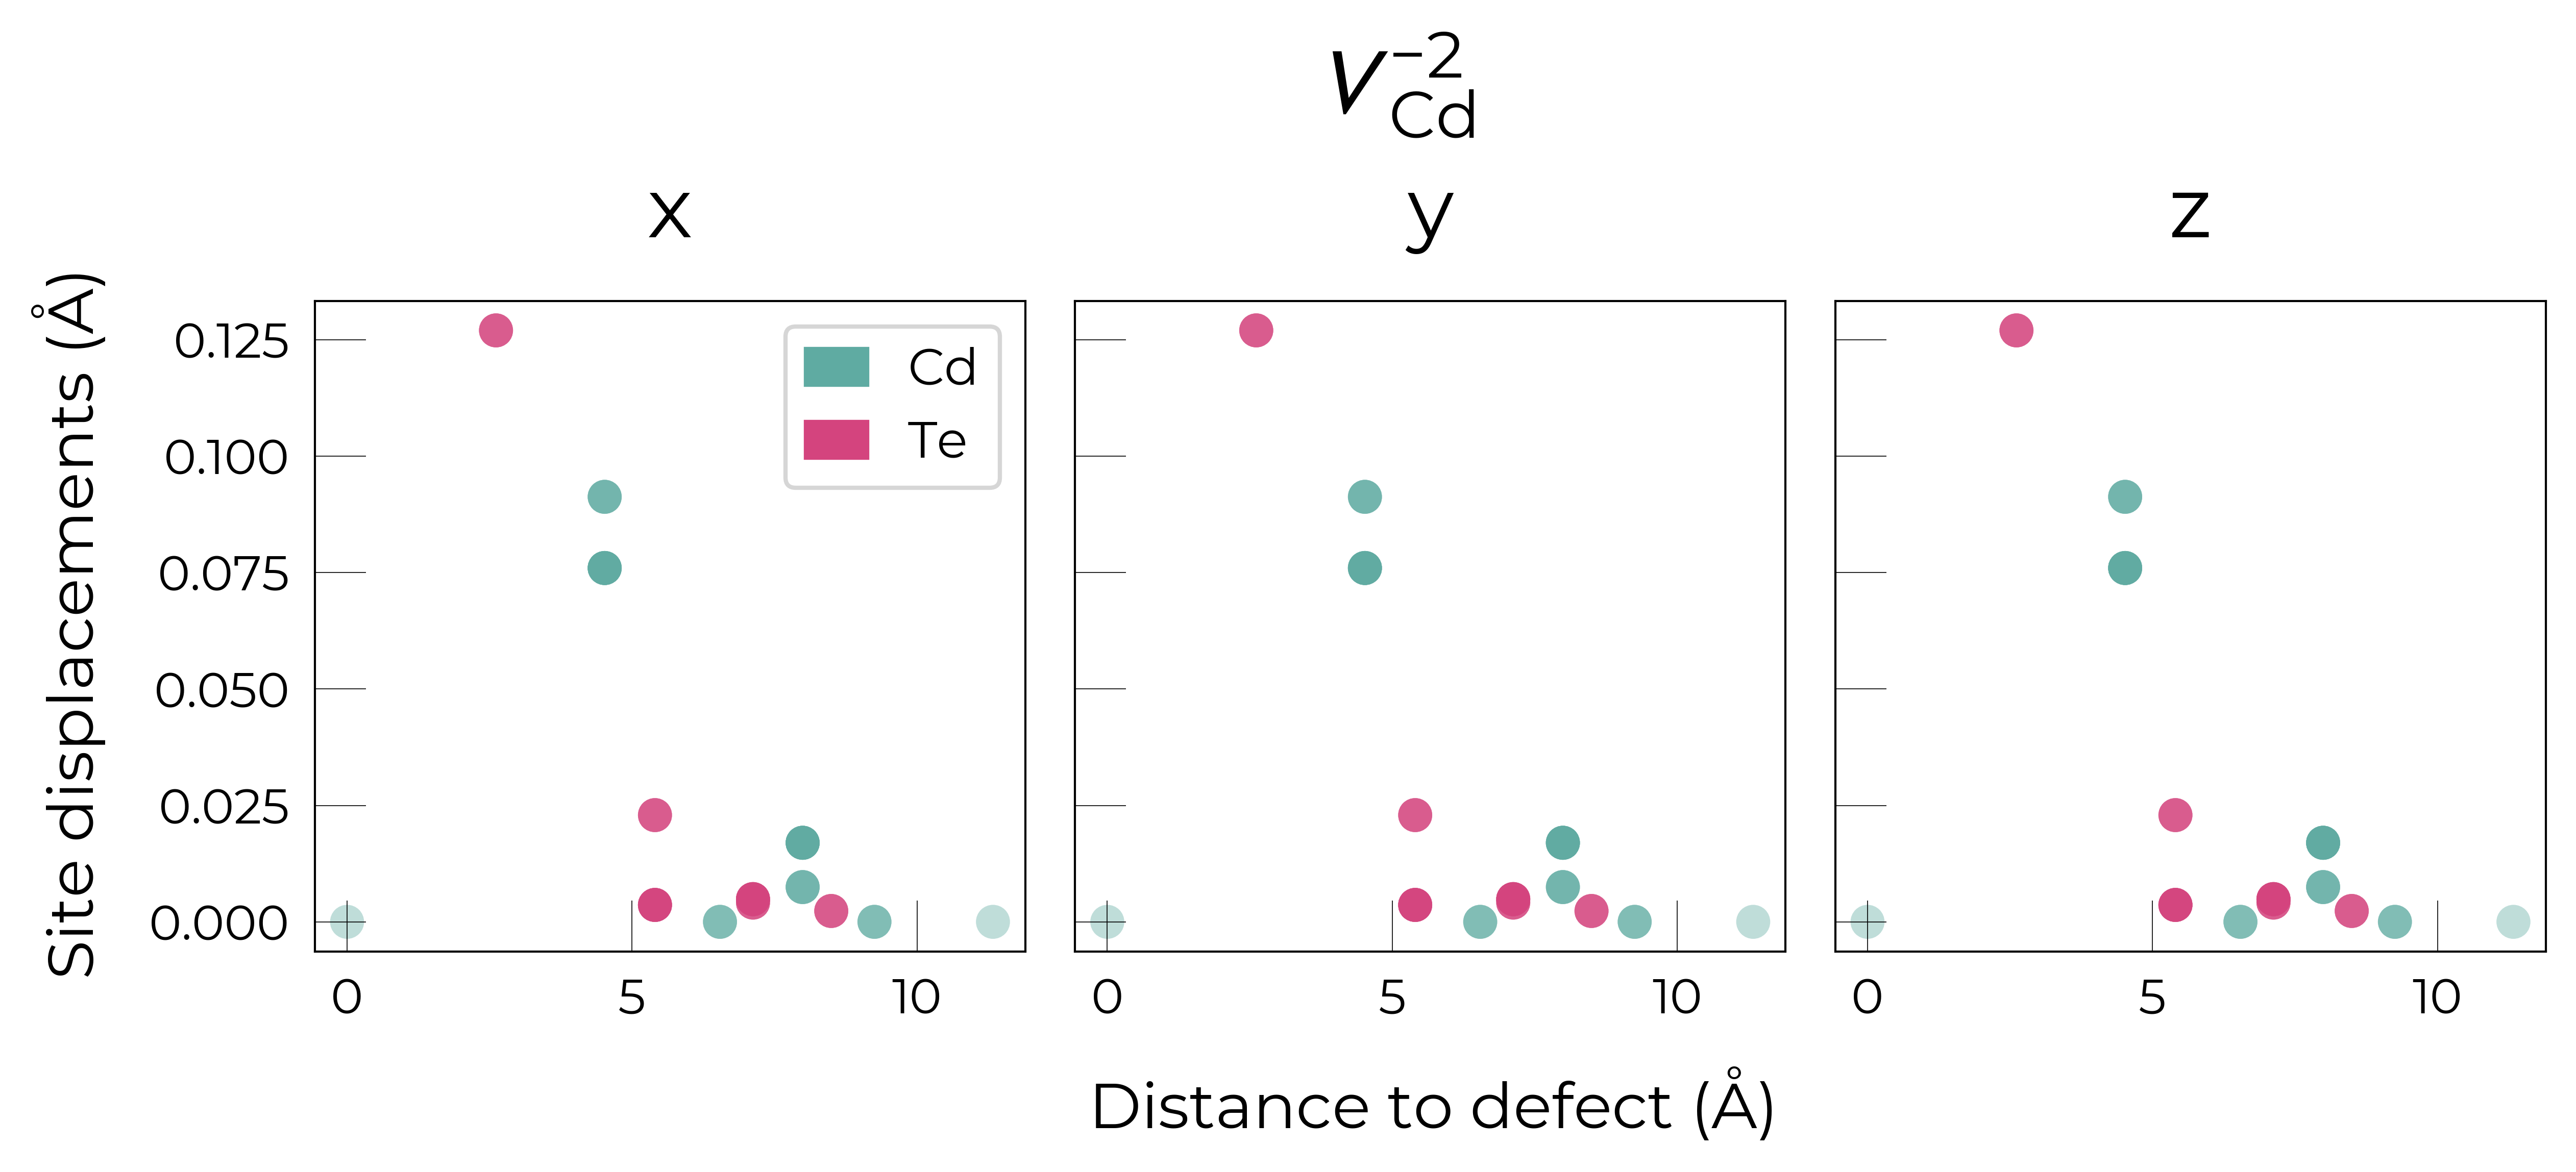

In [3]:
for defect_entry in v_Cd_entries:
    fig = defect_entry.plot_site_displacements(separated_by_direction=True)
    fig.suptitle(format_defect_name(defect_entry.name, include_site_info_in_name=False),
                 y=1.2, fontsize=22)

Here we see that $V_{Cd}^{-2}$ has isotropic (symmetric) displacements of atoms around the vacancy site in the x/y/z directions, which makes sense as it adopts a tetrahedral (`Td`) geometry (as shown in the `get_symmetries_and_degeneracies` output below and discussed in detail in [this paper](https://pubs.acs.org/doi/10.1021/acsenergylett.1c00380)).
As expected, we see an exponential tail-off in the site displacement magnitudes as we move away from the defect, and it is the Te nearest neighbours which are most strongly perturbed.

For $V_{Cd}^{-1}$, we have a [Jahn-Teller-distorted](https://pubs.acs.org/doi/10.1021/acsenergylett.1c00380) $C_{3v}$ geometry where a neighbouring Te atom displaces along the [111] direction away from the vacancy site (while the other Te atoms displace towards the vacancy but by a smaller degree), while for $V_{Cd}^{0}$, we have a $C_{2v}$ geometry where two neighbouring Te displace significantly towards the vacancy and each other (~1 Å) forming a dimer bond, while the other two Te move a smaller distance towards the vacancy (~0.2 Å) as seen in the displacement plots and illustrated below.

In [4]:
from doped.thermodynamics import DefectThermodynamics
v_Cd_thermo = DefectThermodynamics(v_Cd_entries)
v_Cd_thermo.get_symmetries_and_degeneracies()

Defect   q Site_Symm Defect_Symm  g_Orient  g_Spin  g_Total  Mult
0   v_Cd   0        Td         C2v       6.0       1      6.0   1.0
1   v_Cd  -1        Td         C3v       4.0       2      8.0   1.0
2   v_Cd  -2        Td          Td       1.0       1      1.0   1.0


<img src="../examples/CdTe/V_Cd_geometries.jpeg" width="400"/>

The high symmetry of $V_{Cd}^{-2}$ is evident from the displacement plots above, where it looks like there are much fewer atoms in the plots, however this is just because we have many symmetry-equivalent atoms in this case and so we end up with many overlapping points (and so much less distinct points). Then for $C_{3v}$ $V_{Cd}^{-1}$ we have more distinct sites appearing, and then more so for the lower-symmetry $C_{2v}$ $V_{Cd}^{0}$ structure.

Instead of plotting the *absolute* displacements in the x, y, z directions, we can also plot the  displacements of atoms *relative* to the defect site (i.e. displacement of the atom along the line connecting itself to the defect). A negative displacement indicates that the atom moves towards the defect (compressive strain) while a positive displacement indicates that the atom moves away from the defect (tensile strain):

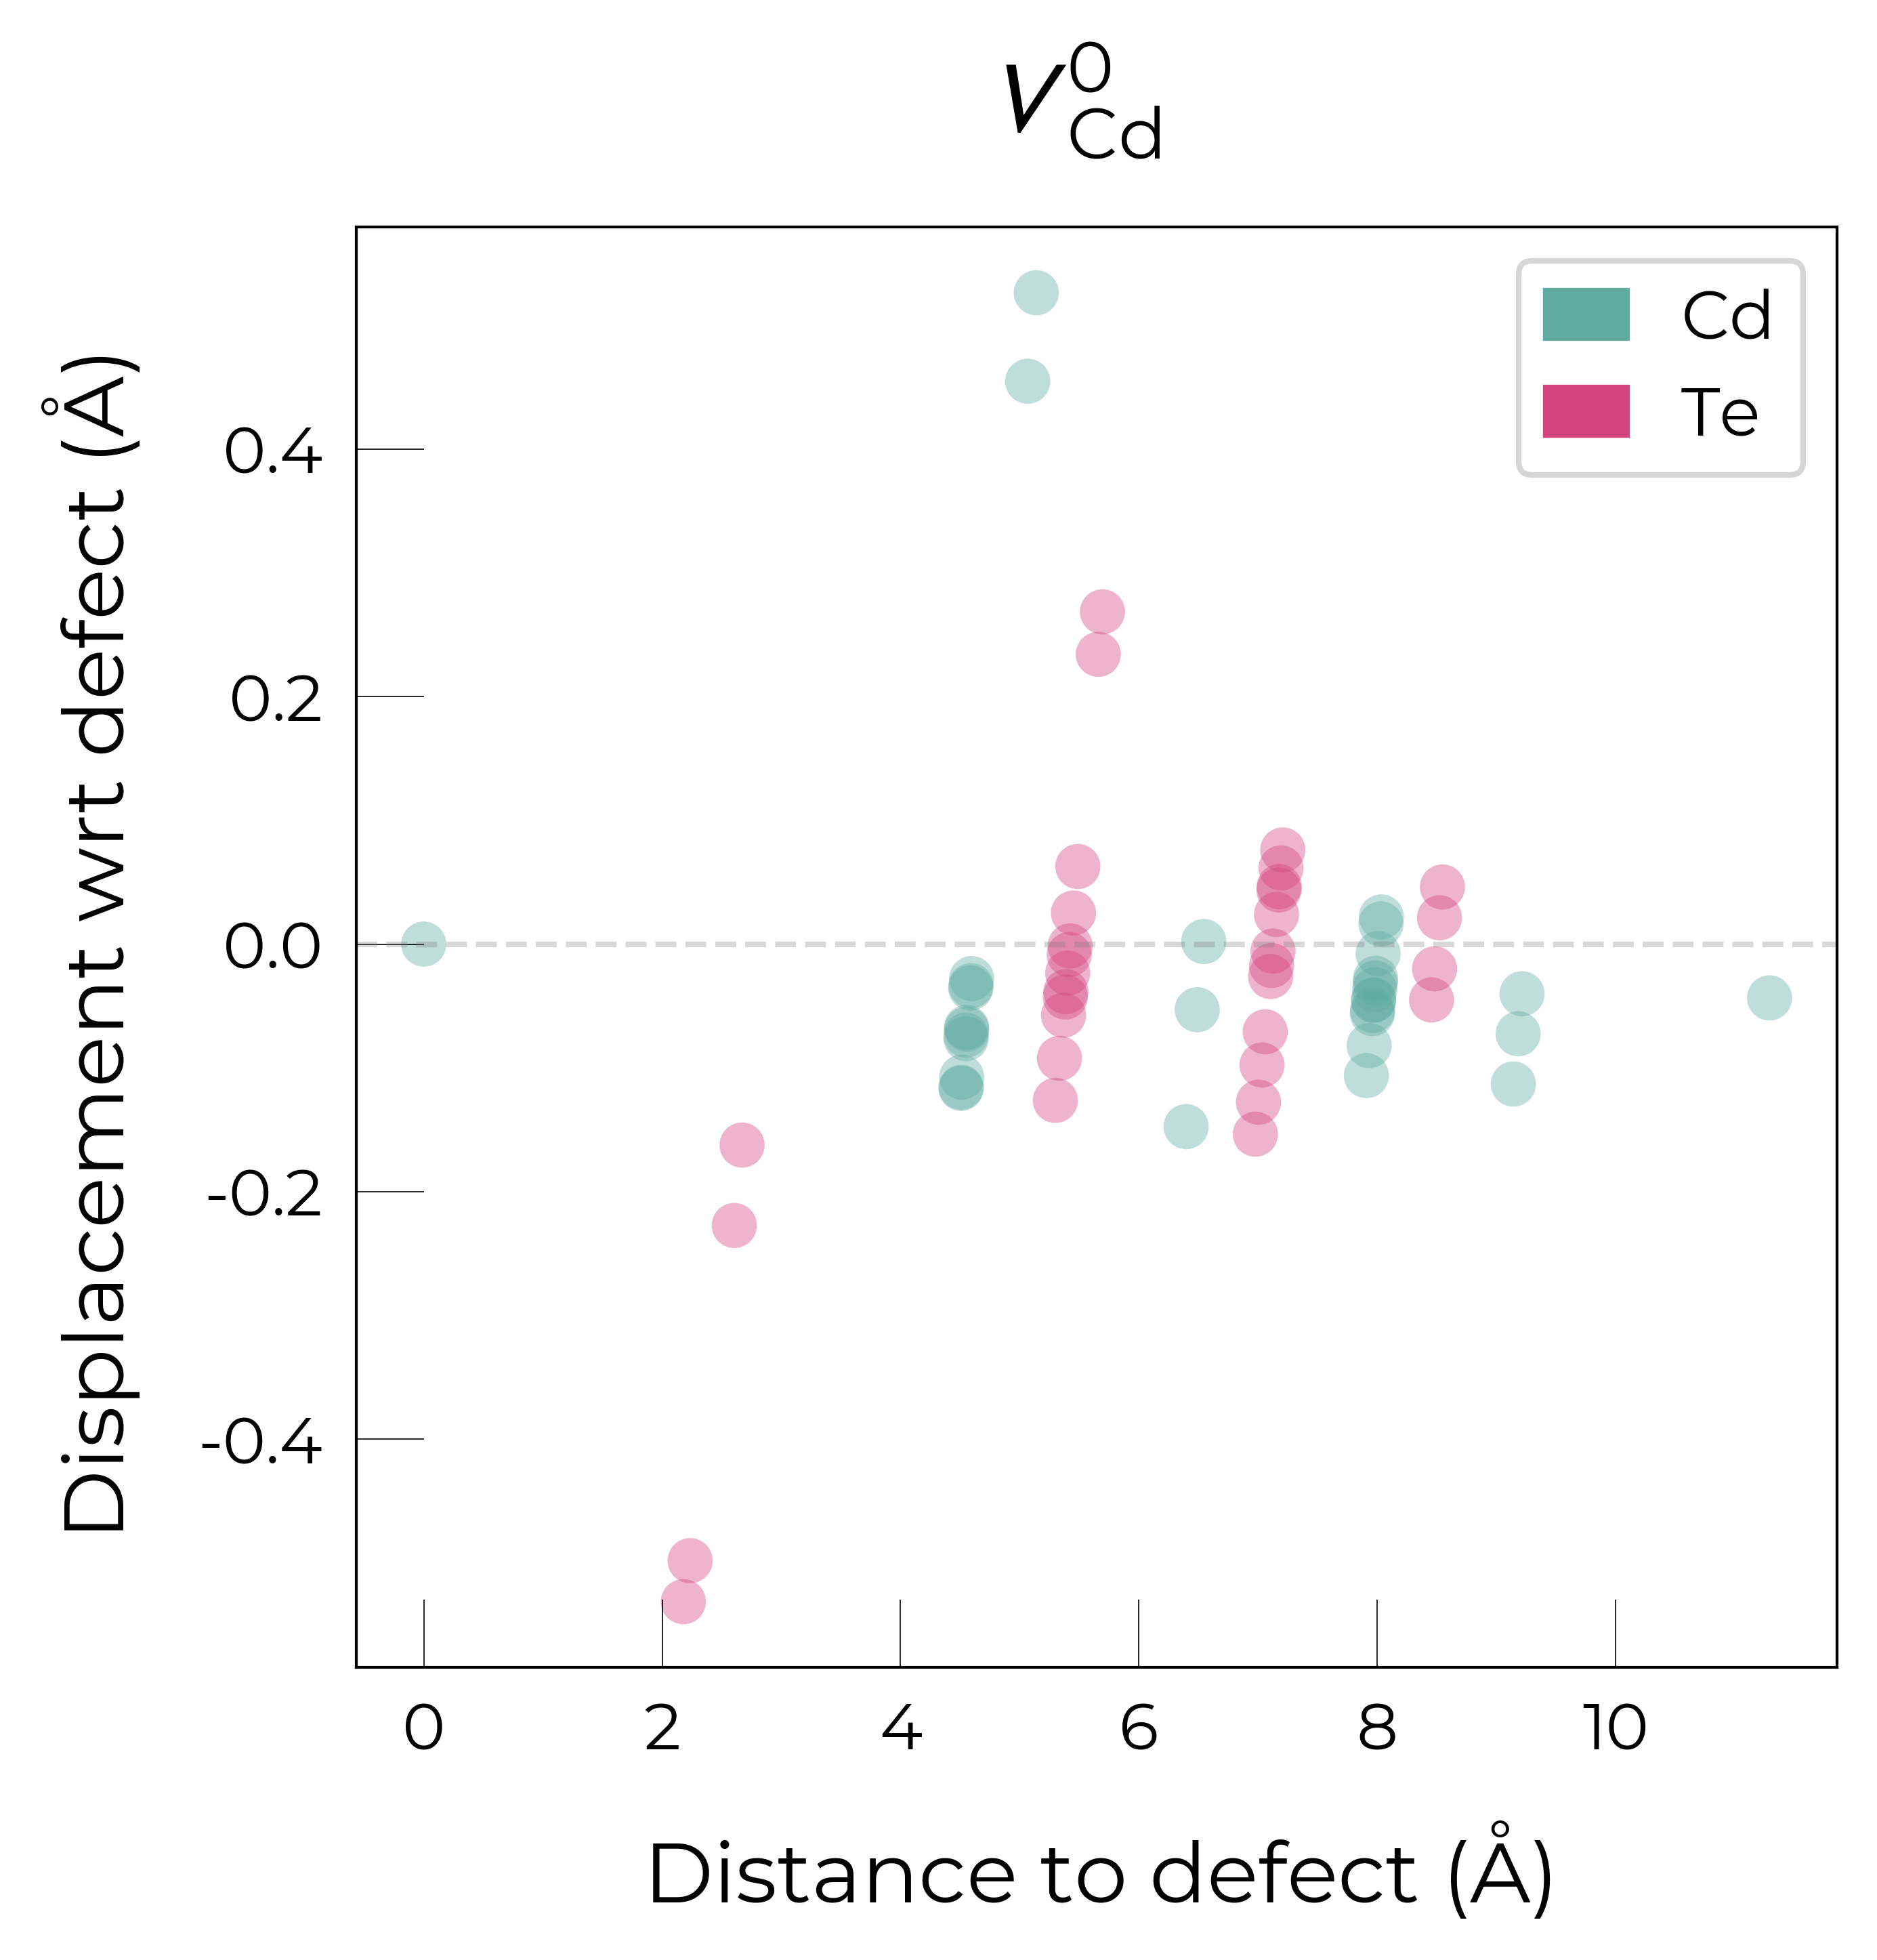

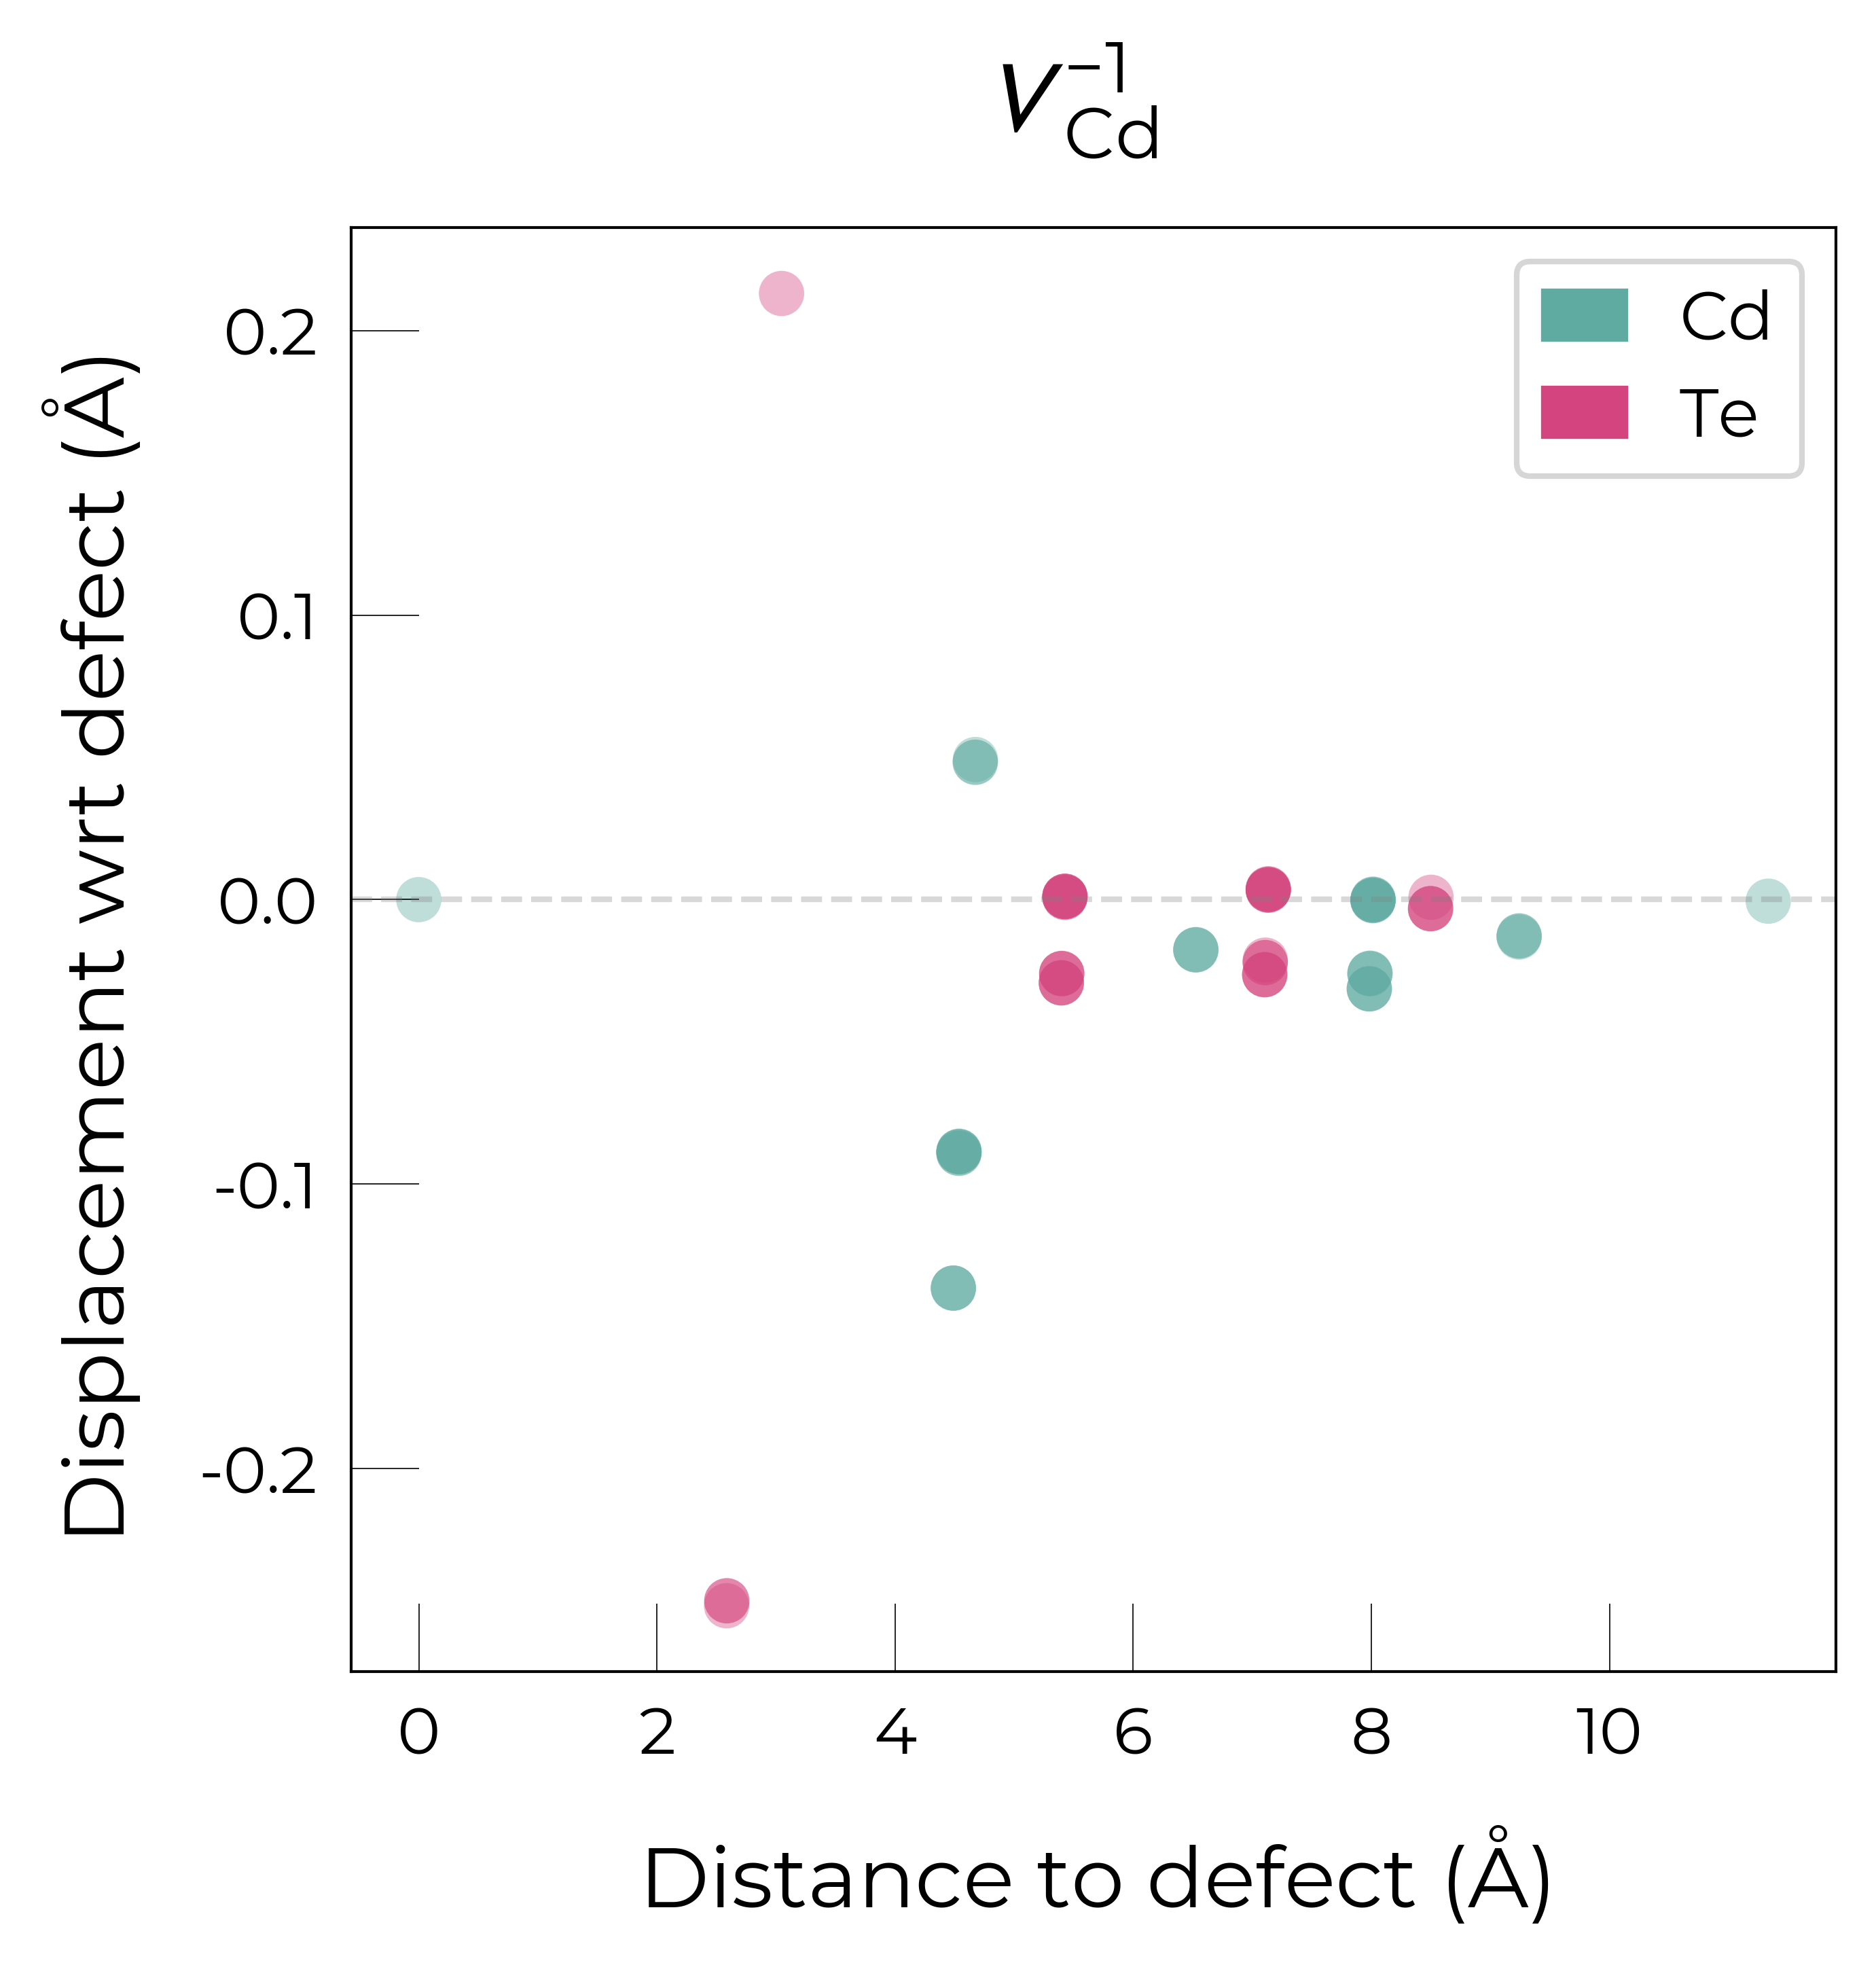

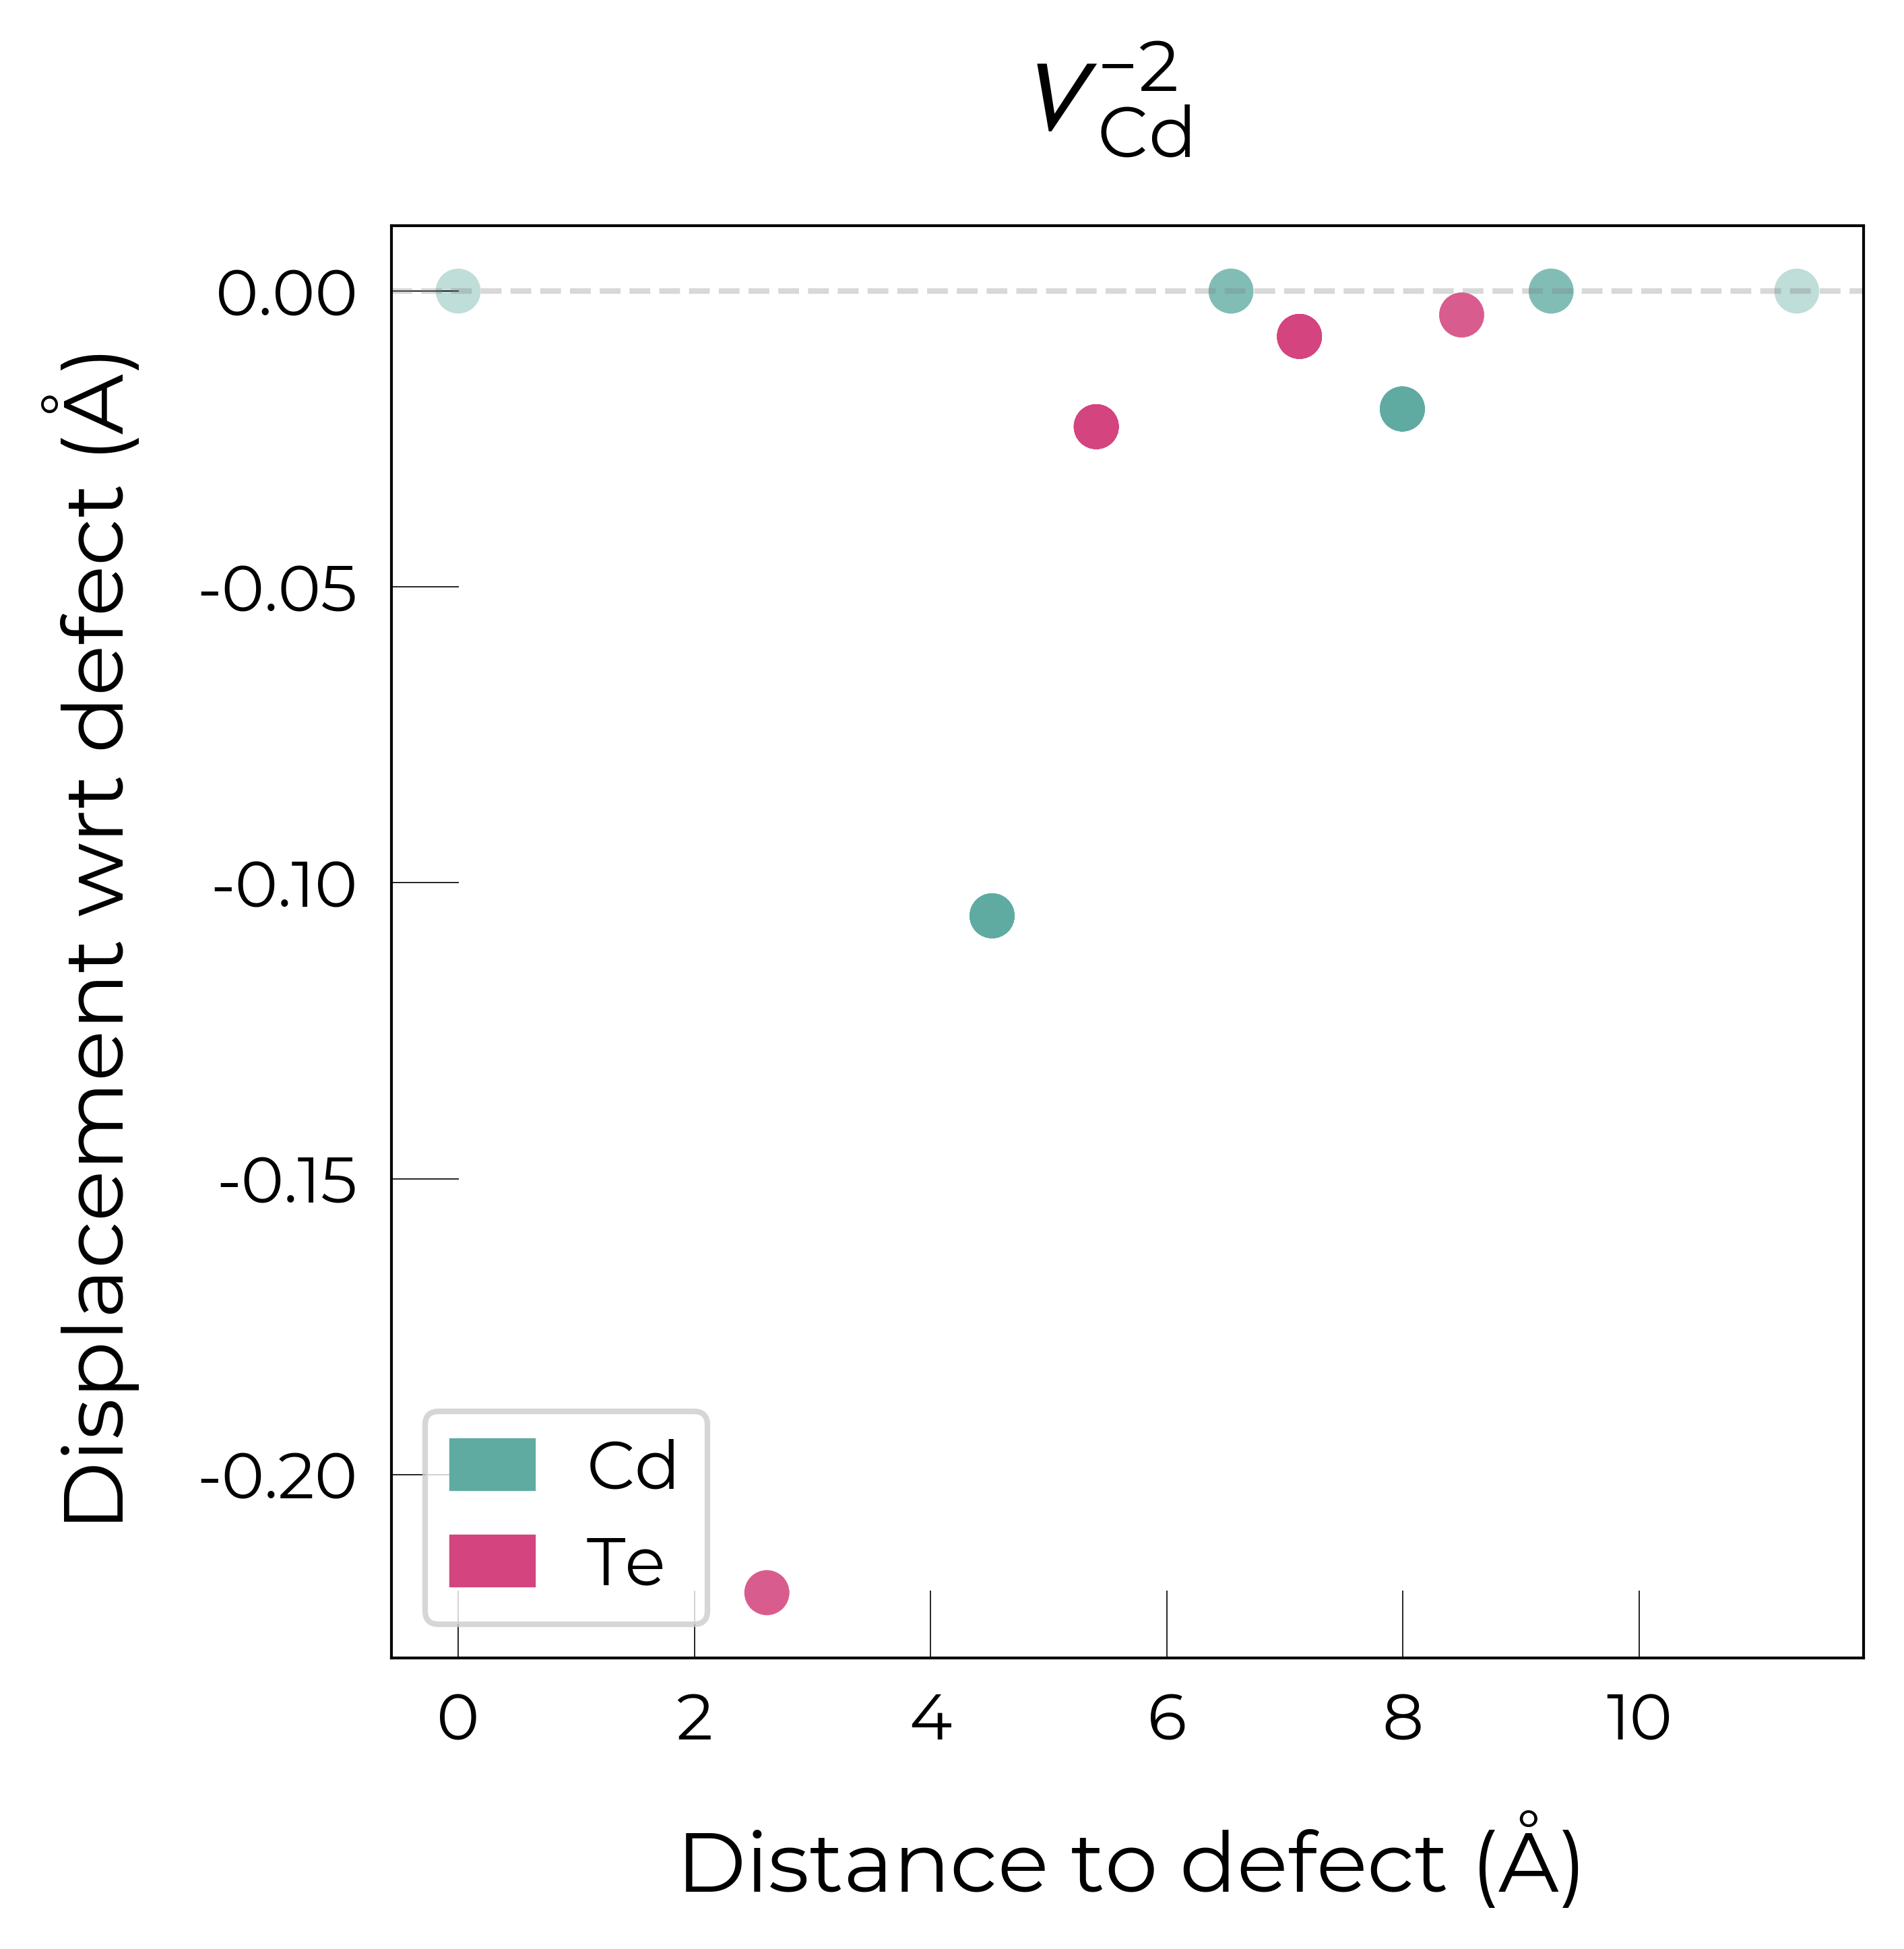

In [5]:
for defect_entry in v_Cd_entries:
    fig = defect_entry.plot_site_displacements(relative_to_defect=True)
    fig.suptitle(format_defect_name(defect_entry.name, include_site_info_in_name=False),
                 fontsize=18)

The above plots clearly show the different reconstructions of each charge state:
* The formation of the neutral vacancy introduces two holes which localise in the Te-Te dimer. These Te atoms forming the dimer displace significantly towards the defect, while the two other NN Te atoms also move towards the vacancy, but to a smaller degree.
* The singly charged vacancy introduces a single hole which localises in one of the Te NNs. This Te atom displaces away from the vacancy in the (-1,-1,-1) direction, while the other 3 Te atoms displace towards the vacancy.
* The doubly charged vacancy keeps the $T_d$ symmetry, with the 4 Te NNs displacing towards the vacancy by 0.2 Å (from the original Cd-Te bond distance of 2.83 Å to a distance of 2.61 Å) to allow for greater hybridization between dangling bonds.

Finally, we can also analyse the displacements along a specific direction. For instance, for the $V_{Cd}^{-1}$ defect, we can plot the displacements of atoms along the (-1, -1, -1) direction (the vector along which one of the Te NNs displaces away from the vacancy):

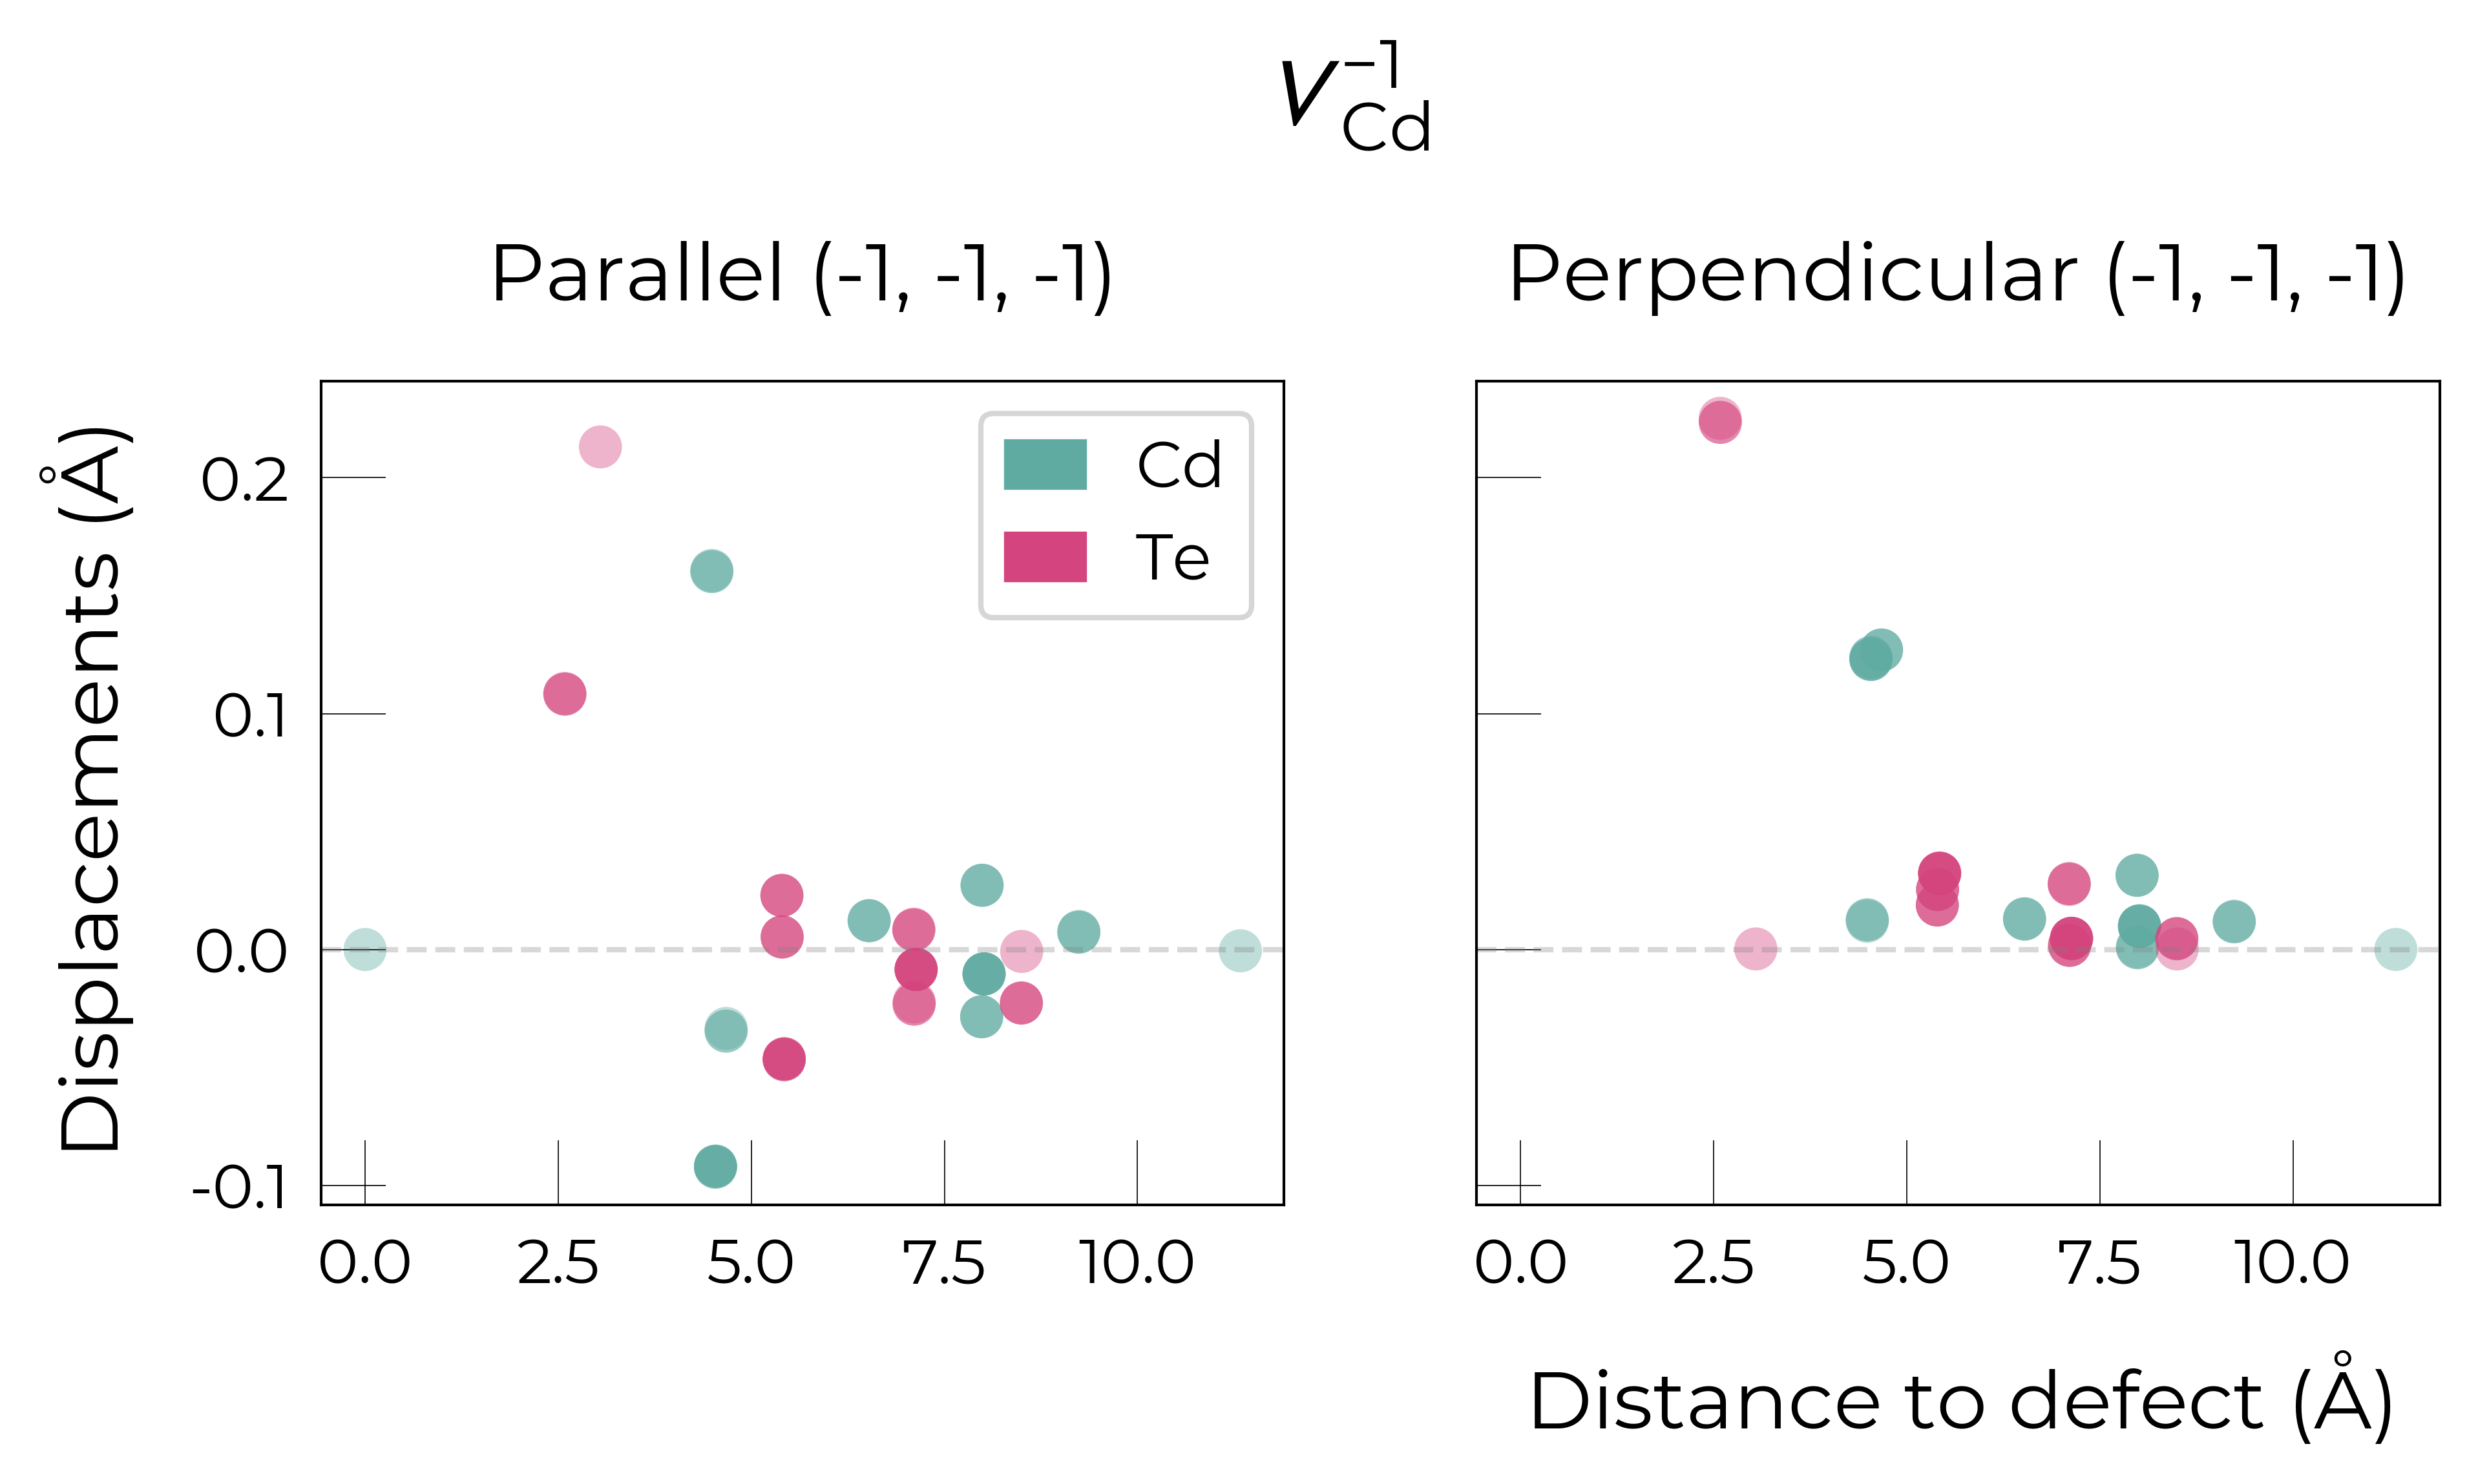

In [3]:
defect_entry = v_Cd_entries[1]
fig = defect_entry.plot_site_displacements(vector_to_project_on=[-1,-1,-1])
_ = fig.suptitle(format_defect_name(defect_entry.name, include_site_info_in_name=False),
                y=1.2, fontsize=18)

which shows how one of the Te NNs displaces in the (-1,-1,-1) direction away from the vacancy, while the other 3 Te atoms displace mostly perpendicular to this direction (overlaped points in the right plot at a distance of 2.5 Å). This is also shown when orienting the defect environment along the (-1,-1,-1) direction, where we see that the Te atom behind the vacancy (in shaded black) has displaced away from the vacancy (from an original distance of 2.8 to 3.0 Å).

<img src="../examples/CdTe/v_Cd_-1_oeriented_along_m1m1m1.png" width="400"/>

Similarly, for the neutral case, we can plot the displacements along the vector connecting the Te dimer ((1,1,0) vector). This will show two Te atoms significantly displacing along this vector, but in opposite directions (moving towards each other to form the dimer bond):

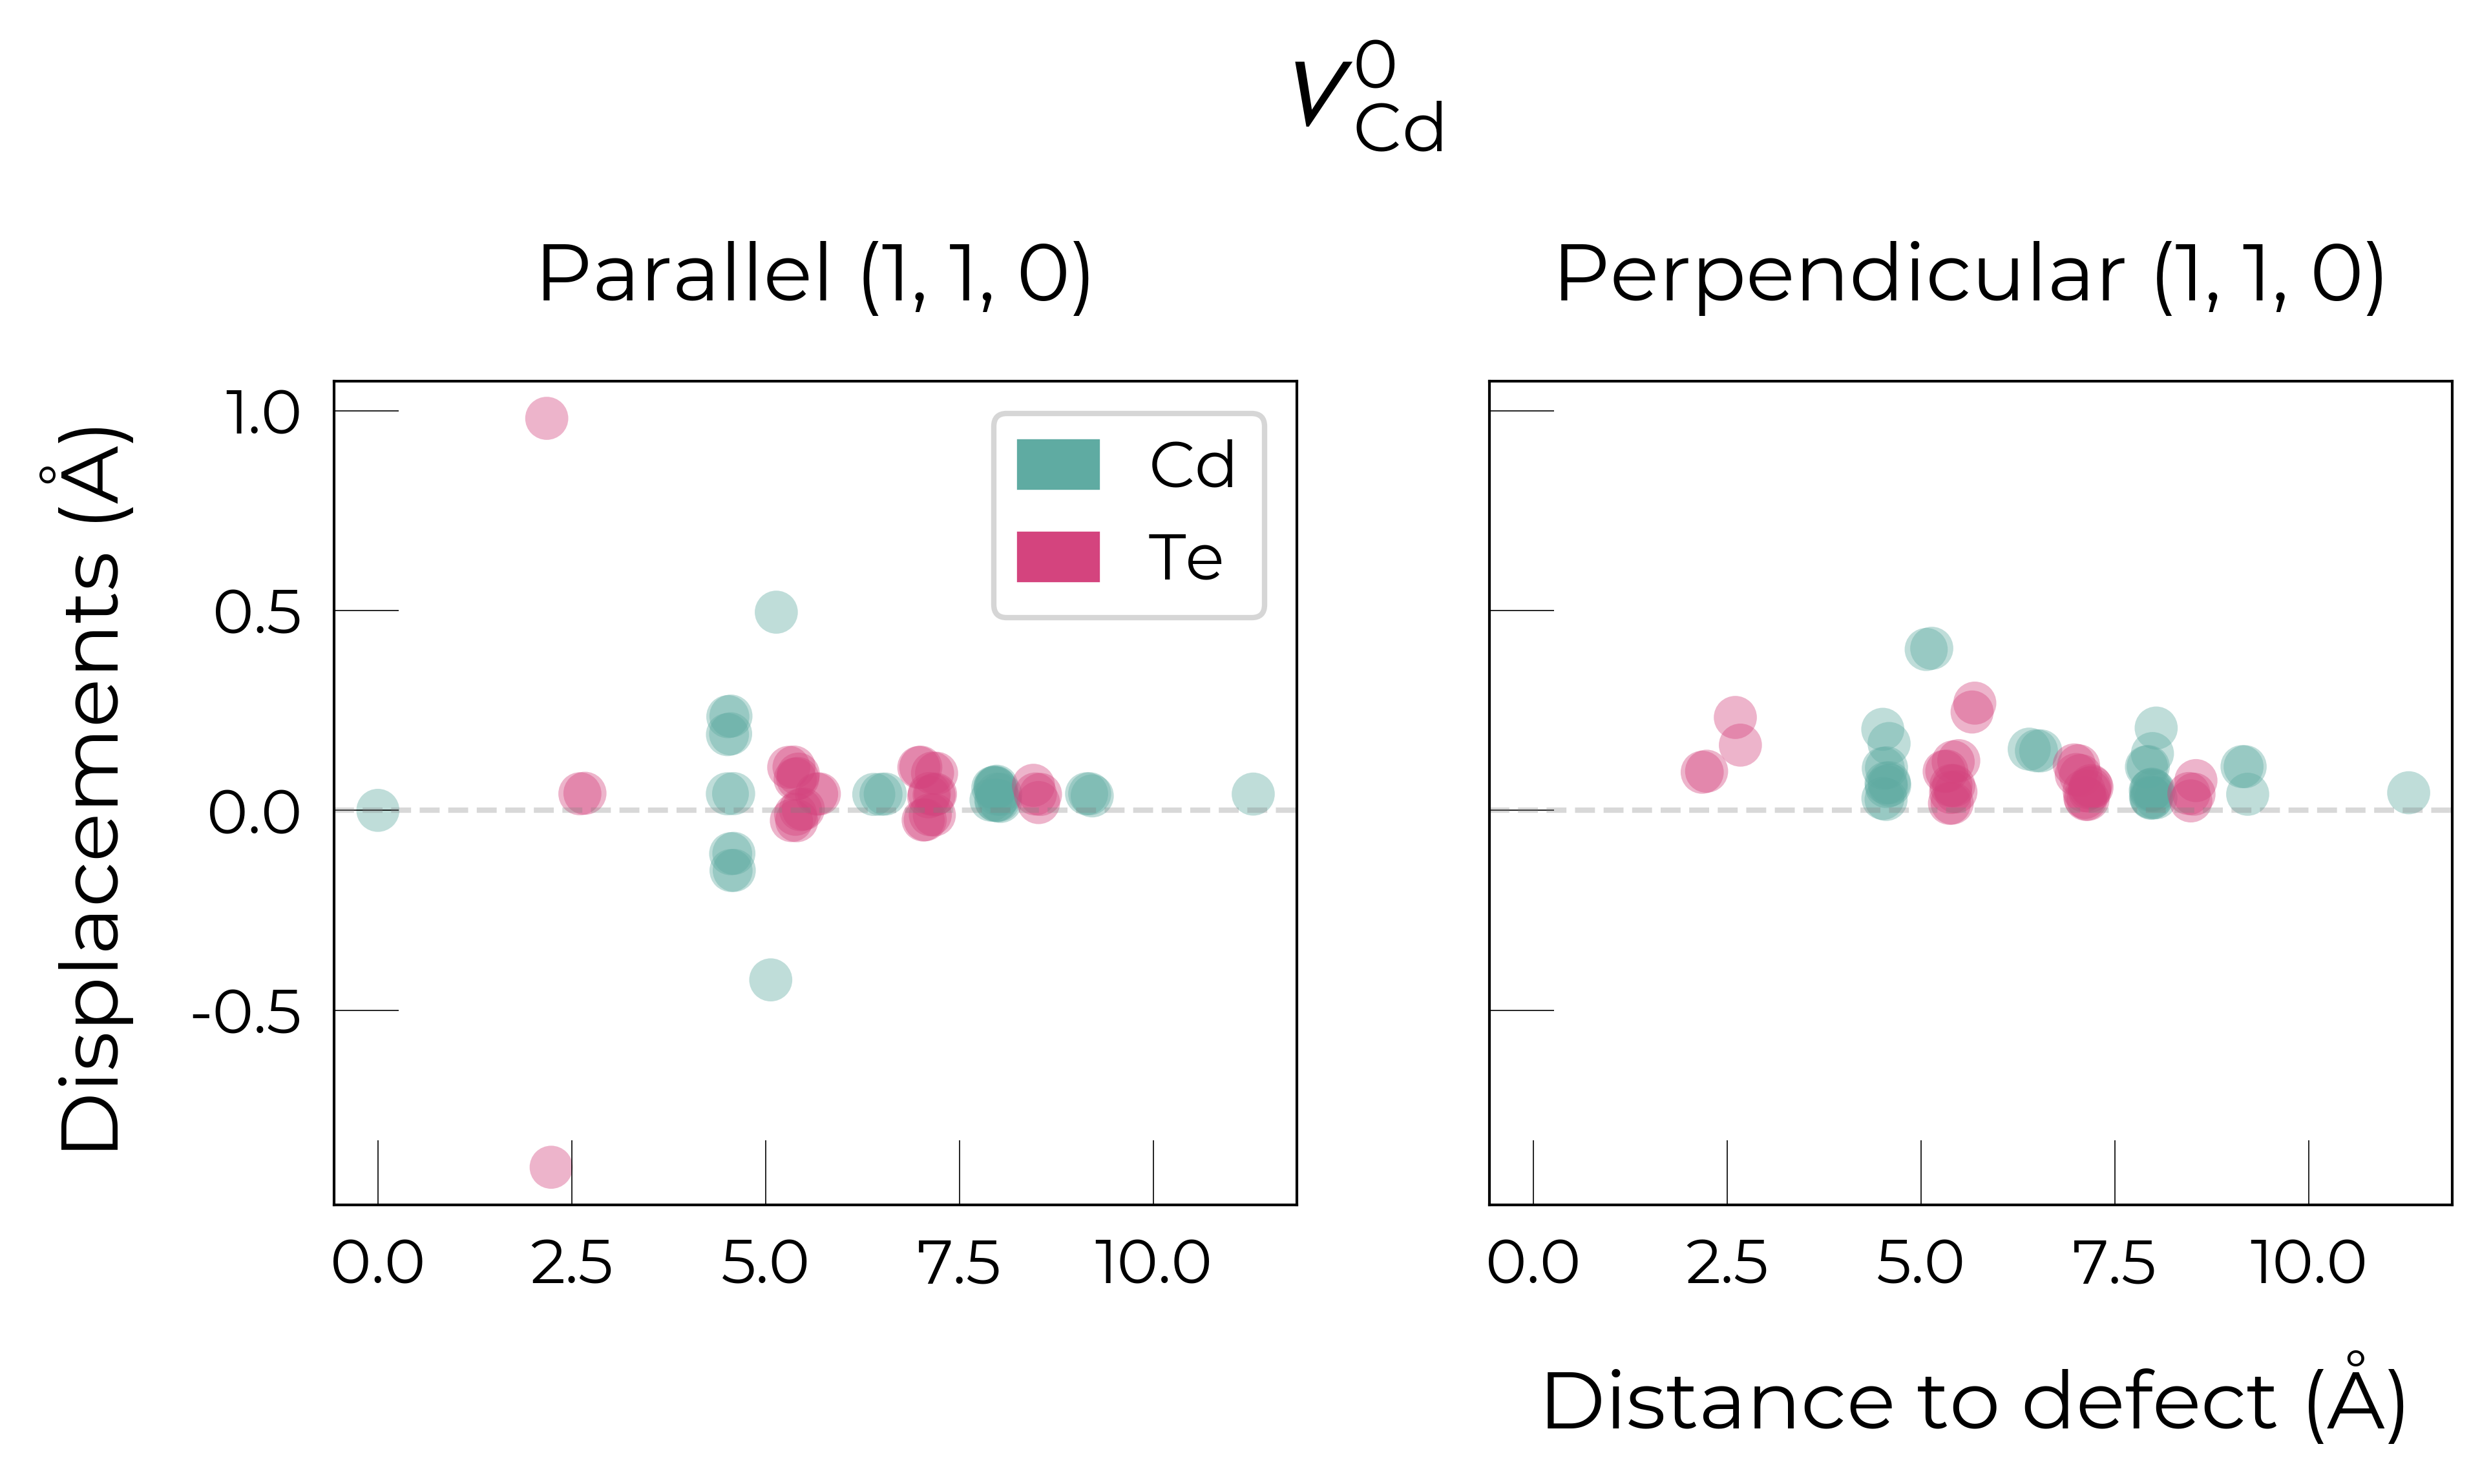

In [4]:
defect_entry = v_Cd_entries[0]  # Neutral state
vector_to_project_on = [1,1,0]  # Vector connecting Te dimer
fig = defect_entry.plot_site_displacements(vector_to_project_on=vector_to_project_on)
_ = fig.suptitle(format_defect_name(defect_entry.name, include_site_info_in_name=False),
                y=1.2, fontsize=18)

which indeed shows one Te moving by 1 Å along the (1,1,0) direction while the other Te moves by ~0.9 Å along the (-1,-1,0) direction, reducing the original Te-Te bond distance from 4.63 Å to 2.75 Å. This can also be visualised by orienting the defect environment along the (1,1,0) direction:

<img src="../examples/CdTe/v_Cd_0_oriented_along_110.png" width="400"/>

```{note}
The data for the atomic site displacements in the relaxed defect supercell is stored in the `DefectEntry.calculation_metadata["site_displacements"]` attributes, which has a dictionary of site displacement vectors (relative to the unperturbed bulk positions) and their (relaxed) distances to the defect site, ordered by the site indices in the defect sueprcell structure.
```

## Processing Cdᵢ `vasp_gam` calculations to see which site is favoured

In [14]:
import os
from doped.analysis import DefectParser

bulk_path = "CdTe/CdTe_bulk/vasp_gam/"  # path to bulk (defect-free) supercell calculation
dielectric = 9.13  # calculated dielectric constant, required for computing defect charge corrections
Cd_i_dict = {}  # Keep dictionary of parsed defect entries

for i in os.listdir("CdTe"):
    if 'Cd_i' in i:
        Cd_i_dict[i] = DefectParser.from_paths(
            defect_path=f"CdTe/{i}/vasp_gam/", bulk_path=bulk_path, dielectric=dielectric).defect_entry

for defect_name, defect_entry in Cd_i_dict.items():
    print(f"Name: {defect_name}; Raw Supercell Energy: {defect_entry.get_ediff():.3f} eV")
    # note this energy is just the energy difference of the bulk and defect supercells (including
    # finite-size charge corrections if any – none here as they're neutral defects), without Fermi
    # level or chemical potential terms (though these are constant for the same defect & charge)

Name: Cd_i_Td_Cd2.83_0; Raw Supercell Energy: 0.592 eV
Name: Cd_i_C3v_0; Raw Supercell Energy: 0.728 eV
Name: Cd_i_Td_Te2.83_0; Raw Supercell Energy: 0.728 eV


Here we see that the Cd-coordinated interstitial site is the lowest energy for _neutral_ cadmium
interstitials here!

```{note}
The energies here do not yet account for the chemical potentials, which are included later in the
post-processing workflow (as shown earlier in this notebook). However, the chemical potential energy
correction is the same for each charge state or site, for a **_given defect_** (e.g. Cd<sub>i</sub>
here) - hence the relative energies are still meaningful here.
```

Here we see that `Cd_i_C3v_0` and `Cd_i_Td_Te2.83_0` have equal final energies (rounded to 1 meV/atom)
suggesting they have relaxed to the same final structure (despite different initial interstitial positions).
Let's use `StructureMatcher` and `local_env` to double-check:

In [24]:
# Here we use the pymatgen StructureMatcher class to compare the relaxed structures of neutral Cd_i:
from pymatgen.analysis.structure_matcher import StructureMatcher
sm = StructureMatcher()
print("Are Cd_i_Td_Cd2.83_0 and Cd_i_C3v_0 final structures the same?:",
      sm.fit(Cd_i_dict['Cd_i_Td_Cd2.83_0'].defect_supercell, Cd_i_dict['Cd_i_C3v_0'].defect_supercell))
print("Are Cd_i_C3v_0 and Cd_i_Td_Te2.83_0 final structures the same?:",
      sm.fit(Cd_i_dict['Cd_i_C3v_0'].defect_supercell, Cd_i_dict['Cd_i_Td_Te2.83_0'].defect_supercell))

Are Cd_i_Td_Cd2.83_0 and Cd_i_C3v_0 final structures the same?: False
Are Cd_i_C3v_0 and Cd_i_Td_Te2.83_0 final structures the same?: True


In [41]:
# we can perform further defect structural analysis with these functions:
from pymatgen.analysis.local_env import CrystalNN
import numpy as np

for key, defect_entry in Cd_i_dict.items():
    # get defect site index in structure: (needed for CrystalNN)
    for i, site in enumerate(defect_entry.defect_supercell.sites):
        if np.isclose(site.frac_coords, defect_entry.defect_supercell_site.frac_coords).all():
            isite = i  # site index, starting from 0

    crystalNN = CrystalNN()
    struct = defect_entry.defect_supercell
    struct.add_oxidation_state_by_guess()
    print("Local order parameters (i.e. resemblence to given structural motif): ",
          crystalNN.get_local_order_parameters(struct, isite))
    print("Nearest-neighbour dictionary: ",
          crystalNN.get_cn_dict(struct, isite))

    bond_lengths = []  # Bond Lengths?
    for i in crystalNN.get_nn_info(struct, isite):
        bond_lengths.append({'Element': i['site'].specie.as_dict()['element'],
                             'Distance': f"{i['site'].distance(struct[isite]):.3f}"})
    print("Bond-lengths (in Angstrom) to nearest neighbours: ", bond_lengths, "\n")

Local order parameters (i.e. resemblence to given structural motif):  None
Nearest-neighbour dictionary:  {'Te0+': 6, 'Cd0+': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Te', 'Distance': '3.298'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}, {'Element': 'Cd', 'Distance': '3.007'}] 

Local order parameters (i.e. resemblence to given structural motif):  {'square co-planar': 0.08049643519922586, 'tetrahedral': 0.9999935468913711, 'rectangular see-saw-like': 0.007133072179242341, 'see-saw-like': 0.23547633536015408, 'trigonal pyramidal': 0.24644908542744104}
Nearest-neighbour dictionary:  {'Te0+': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.911'}, {'Ele

Here we see the structural similarity of "`Cd_i_C3v_0`" and "`Cd_i_Td_Te2.83_0`", showing that they have
 indeed relaxed to the same structure.
This means we only need to continue with one of these for the more expensive `vasp_std` and `vasp_ncl`
calculations with our full _k_-point mesh.

```{note}
If you want to do this coordination environment analysis with a vacancy, you may have to
introduce a fake atom at the vacancy position, in order to create a `pymatgen` `Site` object, to then use with `CrystalNN`.
For example:
```

In [24]:
from doped.thermodynamics import DefectThermodynamics
v_Cd_thermo = DefectThermodynamics(
    [entry for entry in CdTe_defects_thermo.defect_entries if "v_Cd" in entry.name],
    chempots=CdTe_defects_thermo.chempots
)  # only Cd vacancy defects

In [28]:
from pymatgen.analysis.local_env import CrystalNN
from doped.thermodynamics import bold_print

for defect_entry in v_Cd_thermo.defect_entries:
    bold_print(f"{defect_entry.name}, Charge State: {defect_entry.charge_state}")
    crystalNN = CrystalNN(distance_cutoffs=None, x_diff_weight=0.0, porous_adjustment=False, search_cutoff=5)
    struct = defect_entry.defect_supercell.copy()
    struct.append('U', defect_entry.defect_supercell_site.frac_coords) # Add a fake element
    isite = len(struct.sites) - 1 # Starts counting from zero!

    print("Local order parameters (i.e. resemblance to given structural motif): ",
          crystalNN.get_local_order_parameters(struct, isite))
    print("Nearest-neighbour dictionary: ", crystalNN.get_cn_dict(struct, isite))

    bond_lengths = []  # Bond Lengths?
    for i in crystalNN.get_nn_info(struct,isite):
        bond_lengths.append({'Element': i['site'].specie.as_dict()['element'],
                             'Distance': f"{i['site'].distance(struct[isite]):.3f}"})
    print("Bond-lengths (in Angstrom) to nearest neighbours: ",bond_lengths,"\n")

v_Cd_-2, Charge State: -2
Local order parameters (i.e. resemblance to given structural motif):  {'square co-planar': 0.07996848894580866, 'tetrahedral': 0.999999999996243, 'rectangular see-saw-like': 0.007024644113827354, 'see-saw-like': 0.23425369905750856, 'trigonal pyramidal': 0.24520967518806777}
Nearest-neighbour dictionary:  {'Te': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.613'}, {'Element': 'Te', 'Distance': '2.613'}, {'Element': 'Te', 'Distance': '2.613'}, {'Element': 'Te', 'Distance': '2.613'}] 

v_Cd_-1, Charge State: -1
Local order parameters (i.e. resemblance to given structural motif):  {'square co-planar': 0.08955199275710107, 'tetrahedral': 0.9980437792997895, 'rectangular see-saw-like': 0.00914205834683717, 'see-saw-like': 0.2561471898083992, 'trigonal pyramidal': 0.2673736880526364}
Nearest-neighbour dictionary:  {'Te': 4}
Bond-lengths (in Angstrom) to nearest neighbours:  [{'Element': 'Te', 'Distance': '2.585'}, {'Element'